In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
# Basic imports
import jax.numpy as np
import jax.random as jr
import jax.scipy as jsp
import jax
import numpy

#jax.config.update("jax_enable_x64", True)

# Optimisation imports
import zodiax as zdx
import optax

import optimistix as optx

# dLux imports
import dLux as dl
import dLux.utils as dlu

#jax.config.update("jax_enable_x64", True)

from sklearn.decomposition import PCA

# Visualisation imports
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
plt.rcParams['image.cmap'] = 'inferno'
plt.rcParams["font.family"] = "serif"
plt.rcParams["image.origin"] = 'lower'
plt.rcParams['figure.dpi'] = 72
plt.rcParams["font.size"] = 24

from detectors import *
from apertures import *
from models import *
from fisher import *
from stats import posterior
from fitting import *
from plotting import *

def set_array(pytree):
    dtype = np.float64 if jax.config.x64_enabled else np.float32
    floats, other = eqx.partition(pytree, eqx.is_inexact_array_like)
    floats = jtu.tree_map(lambda x: np.array(x, dtype=dtype), floats)
    return eqx.combine(floats, other)

In [3]:
extra_bad = None
#extra_bad = np.isnan(np.zeros((64, 64)).at[35,60].set(np.nan))

#extra_bad = np.isnan(np.zeros((wid,wid))).at[wid//2-3:wid//2+3,:].set(np.nan)


In [4]:
wid = 64#64
oversample = 4

nwavels = 3
npoly=1

n_zernikes = 26#12-1#12-1

optics = NICMOSFresnelOptics(512, wid, oversample, defocus=0., fnumber=80., n_zernikes = n_zernikes)

detector = NICMOSDetector(oversample, wid)

In [5]:
# ddir = "../data/MAST_2025-06-20T23_47_51.088Z/HST/"


# files = """
# na2ma5mrq_cal.fits
# na2ma5msq_cal.fits
# na2ma5mtq_cal.fits
# na2ma5muq_cal.fits
# na2ma5mvq_cal.fits
# na2ma5mwq_cal.fits
# na2ma5mxq_cal.fits
# na2ma5myq_cal.fits
# na2ma5mzq_cal.fits
# na2ma5n1q_cal.fits
# na2ma5n2q_cal.fits
# na2ma5n3q_cal.fits
# na2ma5n4q_cal.fits
# na2ma5n5q_cal.fits
# na2ma5n6q_cal.fits
# na2ma5n7q_cal.fits
# na2ma5n8q_cal.fits
# na2ma5n9q_cal.fits
# na2ma5nbq_cal.fits
# na2ma5ncq_cal.fits
# na2ma5ndq_cal.fits
# na2ma5neq_cal.fits
# na2ma5nfq_cal.fits
# na2ma5ngq_cal.fits
# na2ma5nhq_cal.fits
# na2ma5niq_cal.fits
# na2ma5njq_cal.fits
# na2ma5nkq_cal.fits
# na2ma5nmq_cal.fits
# na2ma5nnq_cal.fits
# na2ma5noq_cal.fits
# na2ma5npq_cal.fits
# na2ma5nqq_cal.fits
# na2ma5nrq_cal.fits
# na2ma5nsq_cal.fits
# na2ma5ntq_cal.fits
# na2ma5nuq_cal.fits
# na2ma5nwq_cal.fits
# na2ma5nxq_cal.fits
# na2ma5nyq_cal.fits
# na2ma5nzq_cal.fits
# na2ma5o0q_cal.fits
# na2ma5o1q_cal.fits
# na2ma5o2q_cal.fits
# na2ma5o3q_cal.fits
# na2ma5o4q_cal.fits
# na2ma5o5q_cal.fits
# na2ma5o7q_cal.fits
# na2ma5o8q_cal.fits
# na2ma5o9q_cal.fits
# na2ma5oaq_cal.fits
# na2ma5obq_cal.fits
# na2ma5ocq_cal.fits
# na2ma5odq_cal.fits
# na2ma5oeq_cal.fits
# na2ma5ofq_cal.fits
# na2ma5ohq_cal.fits
# na2ma5oiq_cal.fits
# na2ma5ojq_cal.fits
# na2ma5okq_cal.fits
# na2ma5olq_cal.fits
# na2ma5omq_cal.fits
# na2ma5onq_cal.fits
# na2ma5ooq_cal.fits
# na2ma5opq_cal.fits
# na2ma5oqq_cal.fits
# na2ma5osq_cal.fits
# na2ma5otq_cal.fits
# na2ma5ouq_cal.fits
# na2ma5ovq_cal.fits
# na2ma5owq_cal.fits
# na2ma5oxq_cal.fits
# na2ma5oyq_cal.fits
# na2ma5ozq_cal.fits
# na2ma5p0q_cal.fits
# na2ma5p2q_cal.fits
# na2ma5p3q_cal.fits
# na2ma5p4q_cal.fits
# na2ma5p5q_cal.fits
# na2ma5p6q_cal.fits
# na2ma5p7q_cal.fits
# na2ma5p8q_cal.fits
# na2ma5p9q_cal.fits
# na2ma5paq_cal.fits
# na2ma5pbq_cal.fits
# na2ma5pdq_cal.fits
# na2ma5peq_cal.fits
# na2ma5pfq_cal.fits
# na2ma5pgq_cal.fits
# na2ma5phq_cal.fits
# na2ma5piq_cal.fits
# na2ma5pjq_cal.fits
# na2ma5pkq_cal.fits
# na2ma5plq_cal.fits
# na2ma5pnq_cal.fits
# na2ma5poq_cal.fits
# na2ma5ppq_cal.fits
# na2ma5pqq_cal.fits
# na2ma5prq_cal.fits
# na2ma5psq_cal.fits
# na2ma5ptq_cal.fits
# na2ma5puq_cal.fits
# na2ma5pvq_cal.fits
# na2ma5pwq_cal.fits
# na2ma5pyq_cal.fits
# na2ma5pzq_cal.fits
# na2ma5q0q_cal.fits
# na2ma5q1q_cal.fits
# na2ma5q2q_cal.fits
# na2ma5q3q_cal.fits
# na2ma5q4q_cal.fits
# na2ma5q5q_cal.fits
# na2ma5q6q_cal.fits
# na2ma5q8q_cal.fits
# na2ma5q9q_cal.fits
# na2ma5qaq_cal.fits
# na2ma5qbq_cal.fits
# na2ma5qcq_cal.fits
# na2ma5qdq_cal.fits
# na2ma5qeq_cal.fits
# na2ma5qfq_cal.fits
# na2ma5qgq_cal.fits
# na2ma5qhq_cal.fits
# na2ma5qjq_cal.fits
# na2ma5qkq_cal.fits
# na2ma5qlq_cal.fits
# na2ma5qmq_cal.fits
# na2ma5qnq_cal.fits
# na2ma5qoq_cal.fits
# na2ma5qpq_cal.fits
# na2ma5qqq_cal.fits
# na2ma5qrq_cal.fits
# na2ma5qtq_cal.fits
# na2ma5quq_cal.fits
# na2ma5qvq_cal.fits
# na2ma5qwq_cal.fits
# na2ma5qxq_cal.fits
# na2ma5qyq_cal.fits
# na2ma5qzq_cal.fits
# na2ma5r0q_cal.fits
# na2ma5r1q_cal.fits
# na2ma5r2q_cal.fits
# na2ma5r4q_cal.fits
# na2ma5r5q_cal.fits
# na2ma5r6q_cal.fits
# na2ma5r7q_cal.fits
# na2ma5r8q_cal.fits
# na2ma5r9q_cal.fits
# na2ma5raq_cal.fits
# na2ma5rbq_cal.fits
# na2ma5rcq_cal.fits
# na2ma5req_cal.fits
# na2ma5rfq_cal.fits
# na2ma5rgq_cal.fits
# na2ma5rhq_cal.fits
# na2ma5riq_cal.fits
# na2ma5rjq_cal.fits
# na2ma5rkq_cal.fits
# na2ma5rlq_cal.fits
# na2ma5rmq_cal.fits
# na2ma5rnq_cal.fits
# na2ma5rpq_cal.fits
# na2ma5rqq_cal.fits
# na2ma5rrq_cal.fits
# na2ma5rsq_cal.fits
# na2ma5rtq_cal.fits
# na2ma5ruq_cal.fits
# na2ma5rvq_cal.fits
# na2ma5rwq_cal.fits
# na2ma5rxq_cal.fits
# na2ma5rzq_cal.fits
# na2ma5s0q_cal.fits
# na2ma5s1q_cal.fits
# na2ma5s2q_cal.fits
# na2ma5s3q_cal.fits
# na2ma5s4q_cal.fits
# na2ma5s5q_cal.fits
# na2ma5s6q_cal.fits
# na2ma5s7q_cal.fits
# na2ma5s8q_cal.fits
# na2ma5saq_cal.fits
# na2ma5sbq_cal.fits
# na2ma5scq_cal.fits
# na2ma5sdq_cal.fits
# na2ma5seq_cal.fits
# na2ma5sfq_cal.fits
# na2ma5sgq_cal.fits
# na2ma5shq_cal.fits
# na2ma5siq_cal.fits
# na2ma5skq_cal.fits
# na2ma5slq_cal.fits
# na2ma5smq_cal.fits
# na2ma5snq_cal.fits
# na2ma5soq_cal.fits
# na2ma5spq_cal.fits
# na2ma5sqq_cal.fits
# na2ma5srq_cal.fits
# na2ma5ssq_cal.fits
# na2ma5stq_cal.fits
# na2ma5svq_cal.fits
# na2ma5swq_cal.fits
# na2ma5sxq_cal.fits
# na2ma5syq_cal.fits
# na2ma5szq_cal.fits
# na2ma5t0q_cal.fits
# na2ma5t1q_cal.fits
# na2ma5t2q_cal.fits
# na2ma5t3q_cal.fits
# na2ma5t5q_cal.fits
# na2ma5t6q_cal.fits
# na2ma5t7q_cal.fits
# na2ma5t8q_cal.fits
# na2ma5t9q_cal.fits
# na2ma5taq_cal.fits
# na2ma5tbq_cal.fits
# na2ma5tcq_cal.fits
# na2ma5tdq_cal.fits
# na2ma5teq_cal.fits
# na2ma5tfq_cal.fits
# na2ma5tgq_cal.fits""".split()[::10]

# #exposures_raw = [exposure_from_file(ddir + file, SinglePointPolySpectrumFit(nwavels), crop=wid, extra_bad=extra_bad) for file in files]

# exposures_raw = [exposure_from_file(ddir + file, SinglePointFit(CombinedPolySpectrum, nwavels), crop=wid, extra_bad=extra_bad) for file in files]

# exposures_single = []
# for exp in exposures_raw:
#     if exp.data.shape == (wid, wid):
#         exposures_single.append(exp)

# #exposures_single = [exposure_from_file(ddir + file, SinglePointPolySpectrumFit(nwavels), crop=wid, extra_bad=extra_bad) for file in files]

# #exposures_binary = [exposure_from_file(ddir + file, BinaryPolySpectrumFit(nwavels), crop=wid, extra_bad=extra_bad) for file in files]

In [6]:
# data = '../data/MAST_2024-09-27T00_15_31.056Z/HST/'

# files = """
# na2a12jmq_cal.fits
# na2a12jnq_cal.fits
# na2a12joq_cal.fits
# na2a12jpq_cal.fits
# na2a12jqq_cal.fits
# na2a12jxq_cal.fits
# na2a12jzq_cal.fits
# na2a12k0q_cal.fits
# na2a12k1q_cal.fits
# na2a12k2q_cal.fits
# na2a12k9q_cal.fits
# na2a12kbq_cal.fits
# na2a12kcq_cal.fits
# na2a12kdq_cal.fits
# na2a12keq_cal.fits
# na2a12klq_cal.fits
# na2a12knq_cal.fits
# na2a12koq_cal.fits
# na2a12kpq_cal.fits
# na2a12kqq_cal.fits
# na2a12kxq_cal.fits
# na2a12kzq_cal.fits
# na2a12l0q_cal.fits
# na2a12l1q_cal.fits
# na2a12l2q_cal.fits
# na2a12lgq_cal.fits
# na2a12liq_cal.fits
# na2a12ljq_cal.fits
# na2a12lkq_cal.fits
# na2a12llq_cal.fits
# na2a12lsq_cal.fits
# na2a12luq_cal.fits
# na2a12lvq_cal.fits
# na2a12lwq_cal.fits
# na2a12lxq_cal.fits
# na2a12m4q_cal.fits
# na2a12m6q_cal.fits
# na2a12m7q_cal.fits
# na2a12m8q_cal.fits
# na2a12m9q_cal.fits
# na2a12mgq_cal.fits
# na2a12miq_cal.fits
# na2a12mjq_cal.fits
# na2a12mkq_cal.fits
# na2a12mlq_cal.fits
# na2a12msq_cal.fits
# na2a12muq_cal.fits
# na2a12mvq_cal.fits
# na2a12mwq_cal.fits
# na2a12mxq_cal.fits
# na2a12n4q_cal.fits
# na2a12n6q_cal.fits
# na2a12n7q_cal.fits
# na2a12n8q_cal.fits
# na2a12n9q_cal.fits
# """.split()[::3]

# print(files)


# #exposures_raw = [exposure_from_file(data+f, SinglePointPolySpectrumFit(nwavels), crop=wid, extra_bad=extra_bad) for f in files]#[:10]
# #exposures_single = []
# #for exp in exposures_raw:
# #    if exp.data.shape == (wid, wid):
# #        exposures_single.append(exp)


In [7]:
data = '../data/MAST_2025-06-26T06_57_47.174Z/HST/'

files = """
na2m01k7q_cal.fits
na2m01k8q_cal.fits
na2m01k9q_cal.fits
na2m01kaq_cal.fits
na2m01kbq_cal.fits
na2m01kcq_cal.fits
na2m01kdq_cal.fits
na2m01keq_cal.fits
na2m01kfq_cal.fits
na2m01kgq_cal.fits
na2m01kiq_cal.fits
na2m01kjq_cal.fits
na2m01kkq_cal.fits
na2m01klq_cal.fits
na2m01kmq_cal.fits
na2m01knq_cal.fits
na2m01koq_cal.fits
na2m01kpq_cal.fits
na2m01kqq_cal.fits
na2m01krq_cal.fits
na2m01ksq_cal.fits
na2m01ktq_cal.fits
na2m01kuq_cal.fits
na2m01kvq_cal.fits
na2m01kwq_cal.fits
na2m01kyq_cal.fits
na2m01kzq_cal.fits
na2m01l0q_cal.fits
na2m01l1q_cal.fits
na2m01l2q_cal.fits
na2m01l3q_cal.fits
na2m01l4q_cal.fits
na2m01l5q_cal.fits
na2m01l6q_cal.fits
na2m01l7q_cal.fits
na2m01l8q_cal.fits
na2m01l9q_cal.fits
na2m01laq_cal.fits
na2m01lbq_cal.fits
na2m01lcq_cal.fits
na2m01leq_cal.fits
na2m01lfq_cal.fits
na2m01lgq_cal.fits
na2m01lhq_cal.fits
na2m01liq_cal.fits
na2m01ljq_cal.fits
na2m01lkq_cal.fits
na2m01llq_cal.fits
na2m01lmq_cal.fits
na2m01lnq_cal.fits
na2m01loq_cal.fits
na2m01lpq_cal.fits
na2m01lqq_cal.fits
na2m01lrq_cal.fits
na2m01lsq_cal.fits
na2m01luq_cal.fits
na2m01lvq_cal.fits
na2m01lwq_cal.fits
na2m01lxq_cal.fits
na2m01lyq_cal.fits
na2m01lzq_cal.fits
na2m01m0q_cal.fits
na2m01m1q_cal.fits
na2m01m2q_cal.fits
na2m01m3q_cal.fits
na2m01m4q_cal.fits
na2m01m5q_cal.fits
na2m01m6q_cal.fits
na2m01m7q_cal.fits
na2m01m8q_cal.fits
na2m01maq_cal.fits
na2m01mbq_cal.fits
na2m01mcq_cal.fits
na2m01mdq_cal.fits
na2m01meq_cal.fits
na2m01mfq_cal.fits
na2m01mgq_cal.fits
na2m01mhq_cal.fits
na2m01miq_cal.fits
na2m01mjq_cal.fits
na2m01mkq_cal.fits
na2m01mlq_cal.fits
na2m01mmq_cal.fits
na2m01mnq_cal.fits
na2m01moq_cal.fits
na2m01mqq_cal.fits
na2m01mrq_cal.fits
na2m01msq_cal.fits
na2m01mtq_cal.fits
na2m01muq_cal.fits
na2m01mvq_cal.fits
na2m01mwq_cal.fits
na2m01mxq_cal.fits
na2m01myq_cal.fits
na2m01mzq_cal.fits
na2m01n0q_cal.fits
na2m01n1q_cal.fits
na2m01n2q_cal.fits
na2m01n3q_cal.fits
na2m01n4q_cal.fits
""".split()[:10]#[::10][:1]
#exposures_raw = [exposure_from_file(data + file, SinglePointFit(CombinedPolySpectrum, nwavels), crop=wid, extra_bad=extra_bad) for file in files]

spectrum_basis = np.ones((1, 3))

exposures_raw = [exposure_from_file(data + file, SinglePointFit(spectrum_basis, "F187N"), crop=wid) for file in files]


exposures_single = []
for exp in exposures_raw:
    if exp.data.shape == (wid, wid):
        exposures_single.append(exp)

/var/folders/hv/659ls99s2sjd7m3dfr17k8cm0000gn/T/ipykernel_69221/3221684930.py:109: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  exposures_raw = [exposure_from_file(data + file, SinglePointFit(spectrum_basis, "F187N"), crop=wid) for file in files]
/var/folders/hv/659ls99s2sjd7m3dfr17k8cm0000gn/T/ipykernel_69221/3221684930.py:109: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  exposures_raw = [exposure_from_file(data + file, SinglePointFit(spectrum_basis, "F187N"), crop=wid) for file in files]
/var/folders/hv/659ls99s2sjd7m3dfr17k8cm0000gn/T/ipykernel_69221/3221684930.py:109: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  exposures_raw = [exposure_from_file(data + file, SinglePointFit(spectrum_basis, "F187N"), crop=wid) for file in files]


106 91
106 91
24 41
106 91
106 91
106 91
106 91
106 91
106 91
106 91


/var/folders/hv/659ls99s2sjd7m3dfr17k8cm0000gn/T/ipykernel_69221/3221684930.py:109: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  exposures_raw = [exposure_from_file(data + file, SinglePointFit(spectrum_basis, "F187N"), crop=wid) for file in files]
/var/folders/hv/659ls99s2sjd7m3dfr17k8cm0000gn/T/ipykernel_69221/3221684930.py:109: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  exposures_raw = [exposure_from_file(data + file, SinglePointFit(spectrum_basis, "F187N"), crop=wid) for file in files]
/var/folders/hv/659ls99s2sjd7m3dfr17k8cm0000gn/T/ipykernel_69221/3221684930.py:109: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  exposures_raw = [exposure_from_file(data + file, SinglePointFit(spectrum_basis, "F187N"), crop=wid) for file in files]
/var/folders/hv/659ls99s2

In [8]:
len(exposures_single)

9

In [9]:
for e in exposures_single:
    print(e.mjd*86400)
    print(e.exptime)
    print(e.target)
    print(e.filter)
    print((1.8-e.pam)*0.0470)

4714991801.467776
3.996392
HD189733
F187N
0.109551313
4714991814.464928
3.996392
HD189733
F187N
0.109551313
4714991840.46528
3.996392
HD189733
F187N
0.10978448
4714991853.465024
3.996392
HD189733
F187N
0.109551313
4714991866.464768
3.996392
HD189733
F187N
0.10978448
4714991879.465376
3.996392
HD189733
F187N
0.10978448
4714991892.46512
3.996392
HD189733
F187N
0.10978448
4714991905.464864
3.996392
HD189733
F187N
0.109551313
4714991918.464608
3.996392
HD189733
F187N
0.10978448


In [10]:
params = {
    #"fluxes": {},
    "positions": {},
    "spectrum": {},
    "aberrations": {},

    #"rot": 0.,

    "cold_mask_shift": {},
    "cold_mask_rot": {},
    "cold_mask_scale": {},
    "cold_mask_shear": {},
    "primary_scale": {},
    "primary_rot": {},
    "primary_shear": {},
    "outer_radius": 1.2*0.955,
    "secondary_radius": 0.372*1.2,
    "spider_width": 0.077*1.2,
    "scale": 0.0432,

    "softening": 2.,#0.1,
    "bias": {},
    "jitter": {},
    "defocus": {},#1e5#{}
    "fnumber": 78.75,
}

for exp in exposures_single:
    params["positions"][exp.fit.get_key(exp, "positions")] = np.asarray([0.,0.])
    params["spectrum"][exp.fit.get_key(exp, "spectrum")] = np.log10(np.nansum(exp.data)/3)-3#np.zeros(npoly).at[0].set(1)*np.log10(np.nansum(exp.data)/nwavels/0.3)
    params["aberrations"][exp.fit.get_key(exp, "aberrations")] = np.zeros(n_zernikes)
    params["cold_mask_shift"][exp.fit.get_key(exp, "cold_mask_shift")] = np.asarray([8., 8.])#*1e2
    params["cold_mask_rot"][exp.fit.get_key(exp, "cold_mask_rot")] = -45.
    params["cold_mask_scale"][exp.fit.get_key(exp, "cold_mask_scale")] = np.asarray([1.,1.])
    params["cold_mask_shear"][exp.fit.get_key(exp, "cold_mask_shear")] = np.asarray([0.,0.])
    params["primary_rot"][exp.fit.get_key(exp, "primary_rot")] = -45. + 90. #+ 180.
    params["primary_scale"][exp.fit.get_key(exp, "primary_scale")] = np.asarray([1.,1.])
    params["primary_shear"][exp.fit.get_key(exp, "primary_shear")] = np.asarray([0.,0.])
    params["defocus"][exp.fit.get_key(exp, "defocus")] = -2.#2.4#800.#160.*20

    params["bias"][exp.fit.get_key(exp, "bias")] = 0.
    params["jitter"][exp.fit.get_key(exp, "jitter")] = 7/43*oversample


model_single = set_array(NICMOSModel(exposures_single, params, optics, detector))
#model_binary = set_array(NICMOSModel(exposures_binary, params, optics, detector))


params = ModelParams(params)

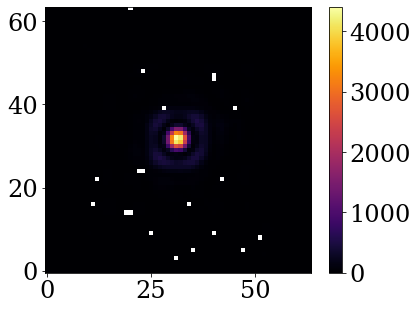

In [11]:
plt.imshow(exposures_single[0].data)
plt.colorbar()

In [12]:
np.nanmax(exposures_single[0].data)

Array(4408.812, dtype=float32)

7.892006
7.4083533
7.8389
6.696975
7.1020613
7.3234434
7.397671
7.8136053
7.7164936


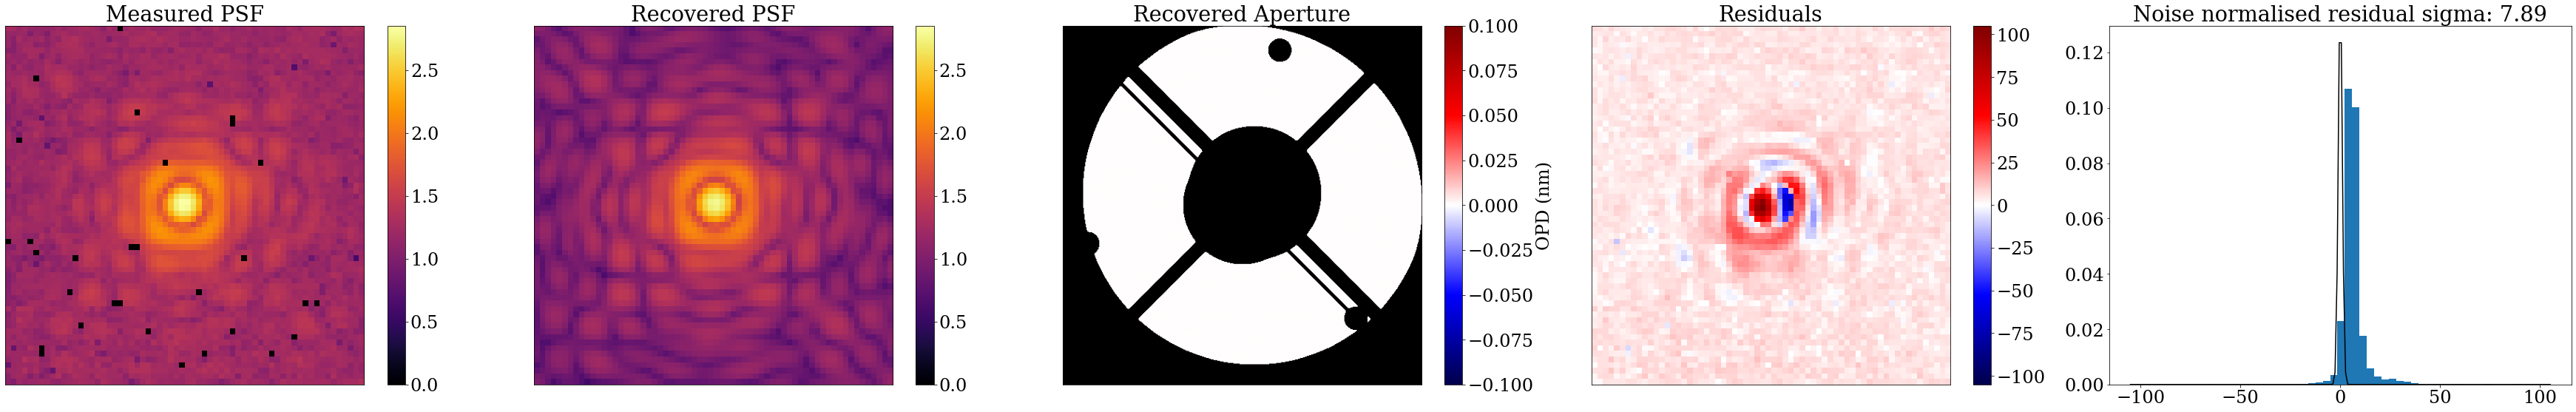

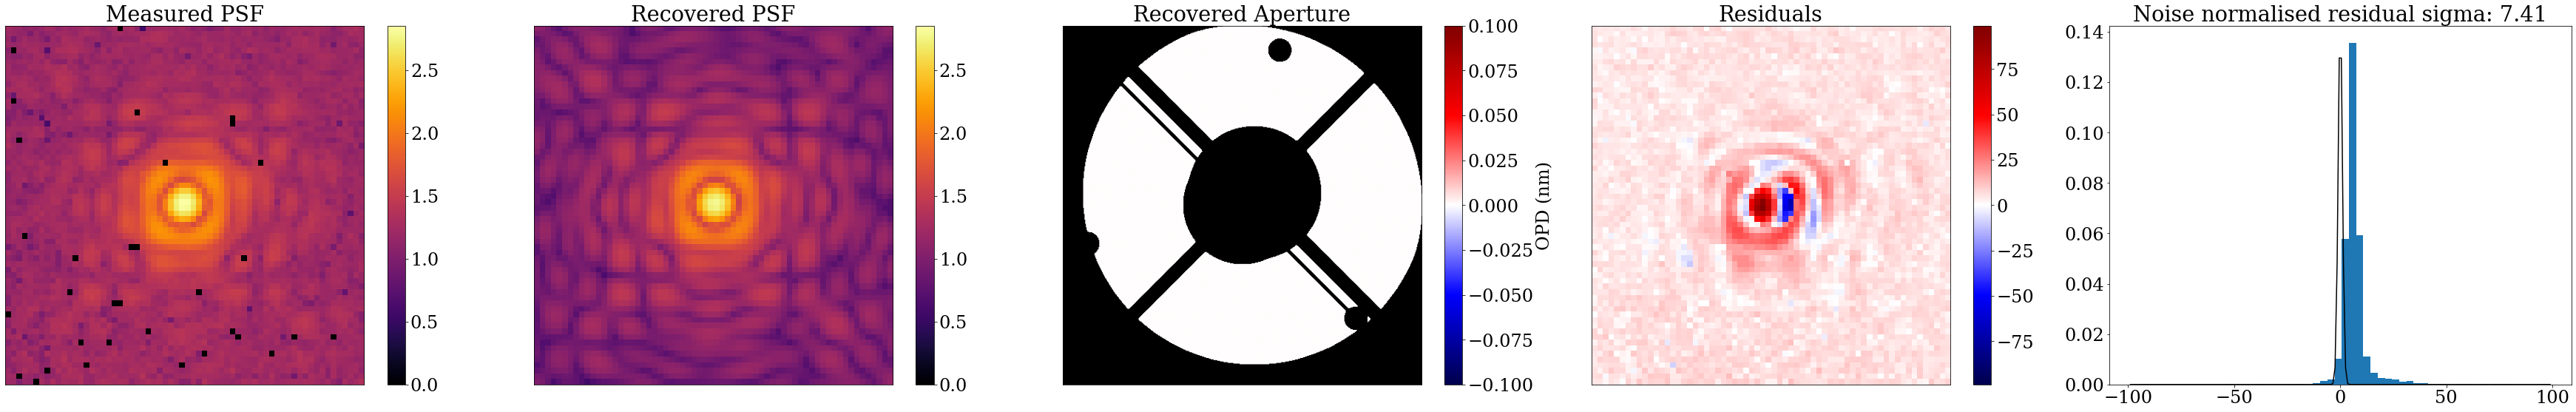

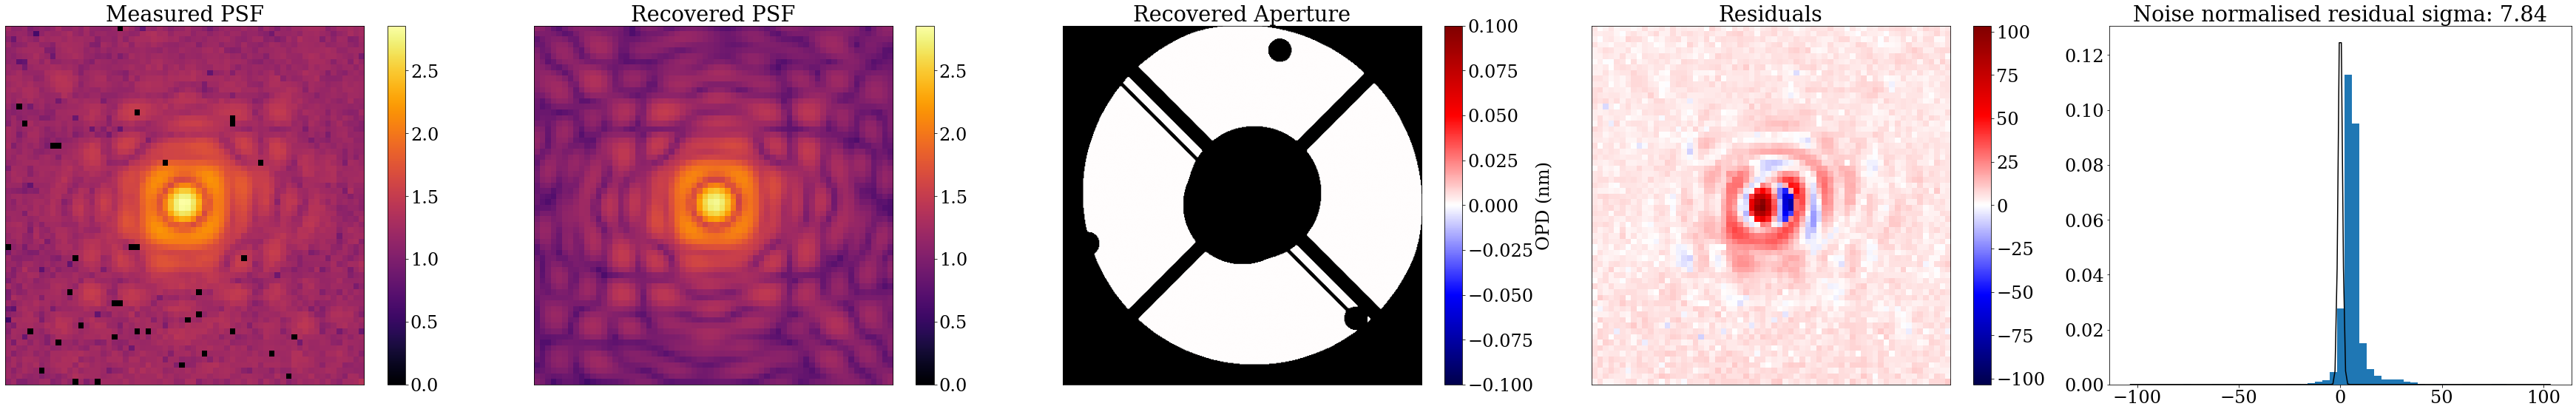

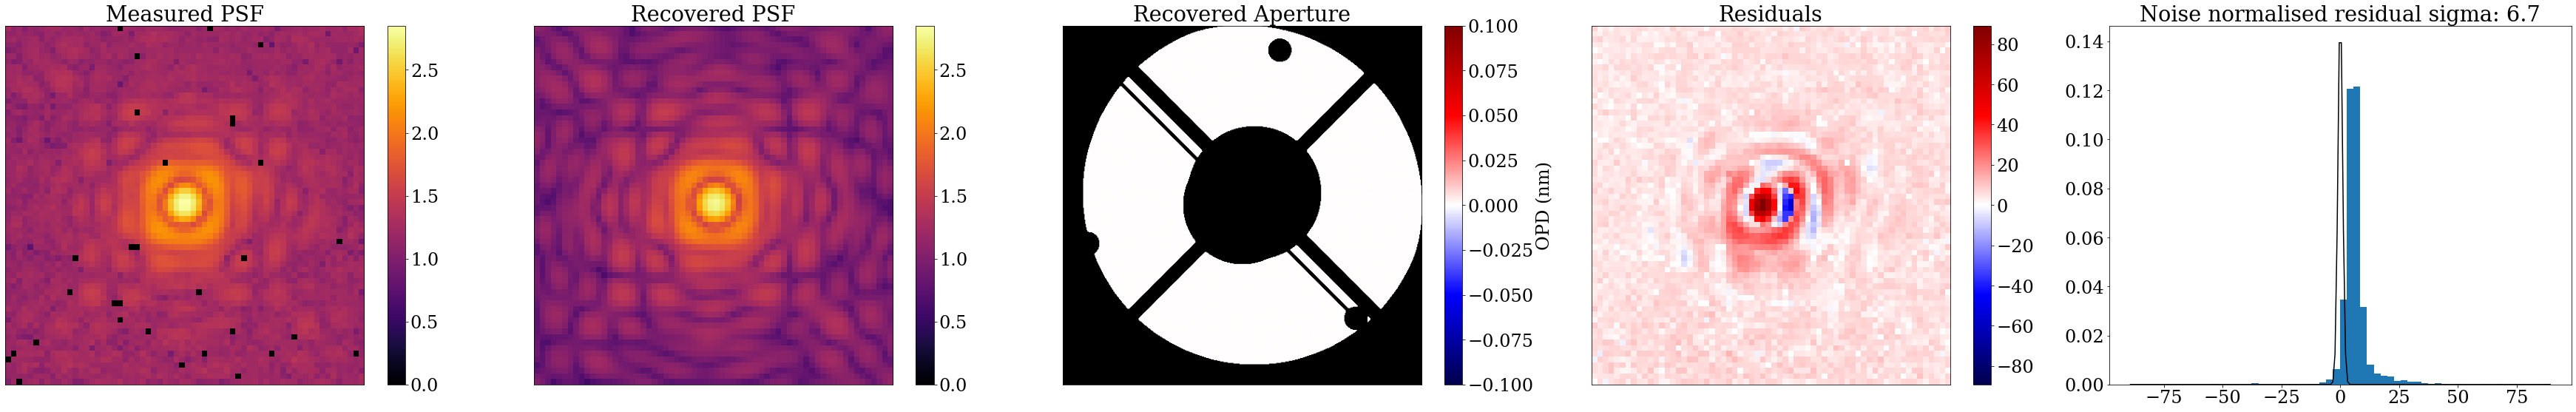

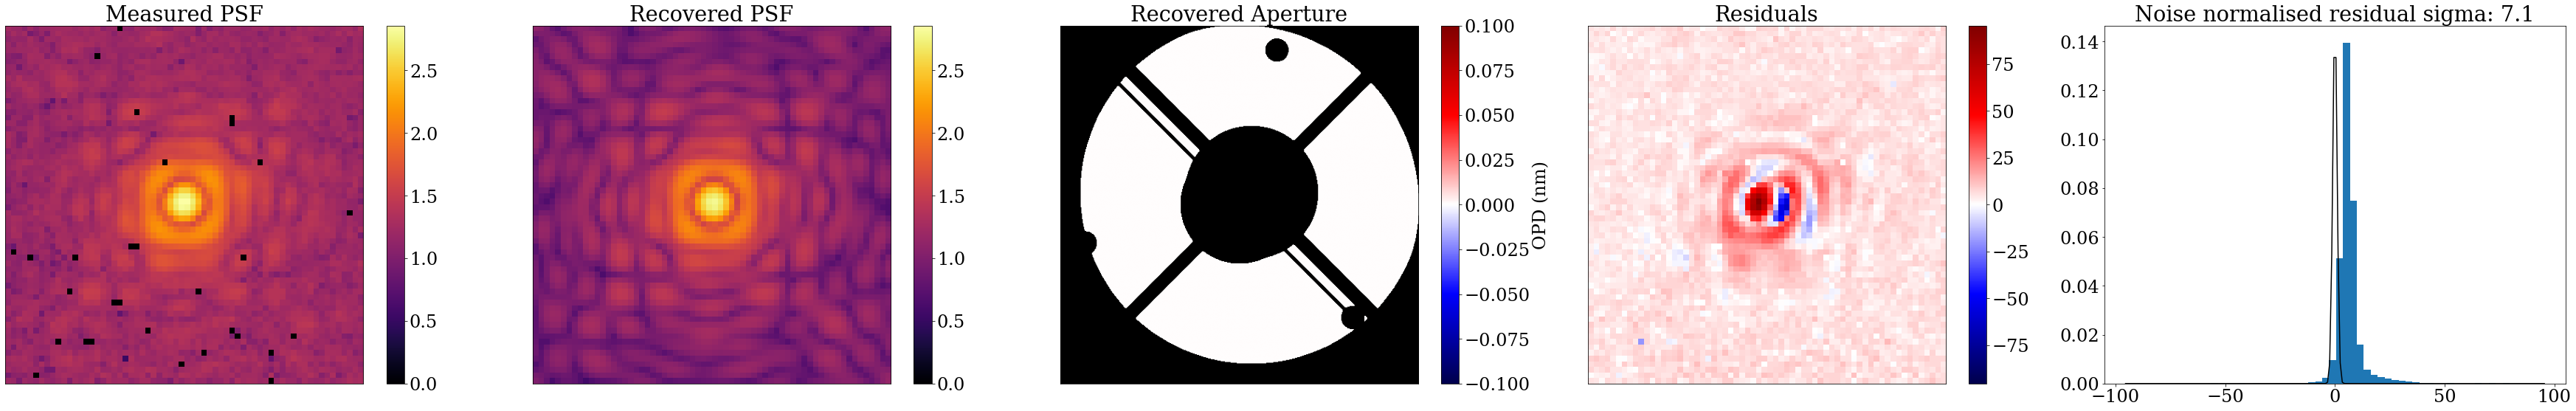

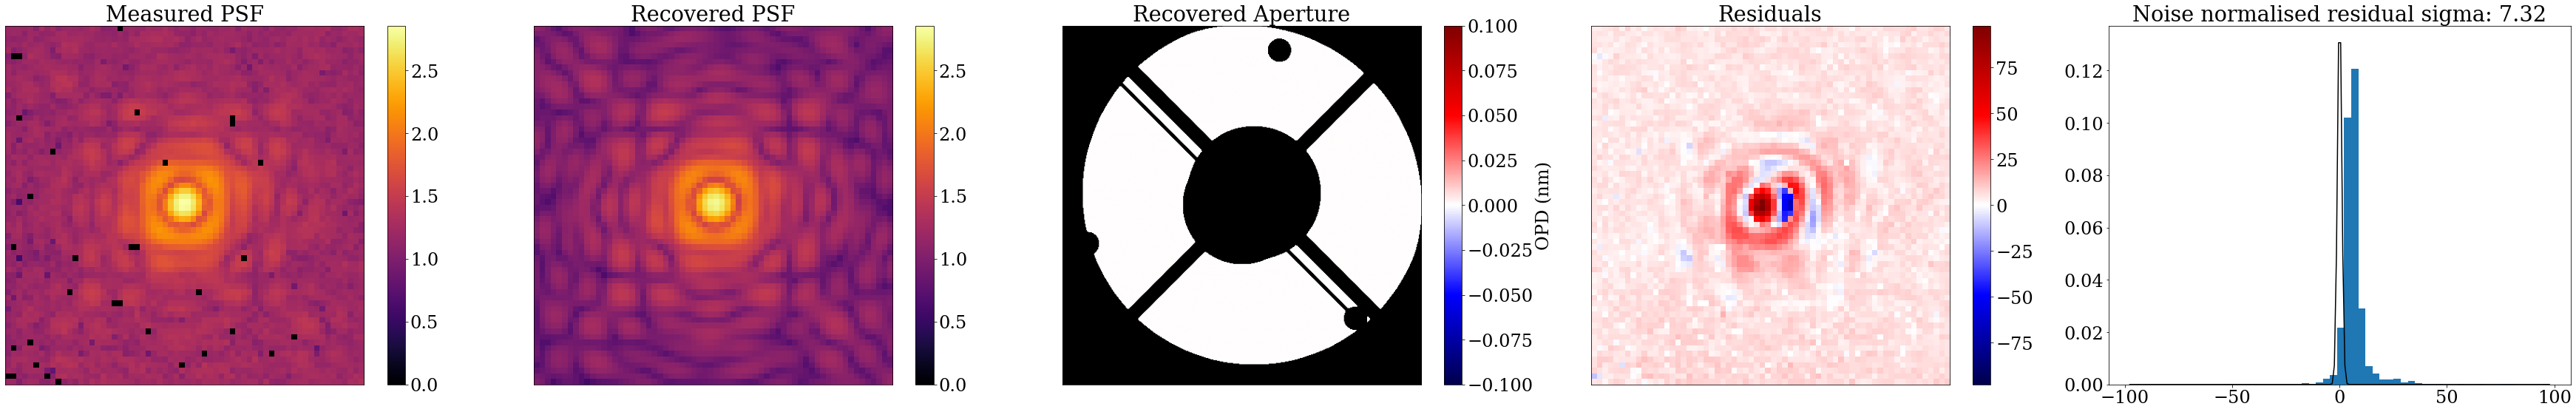

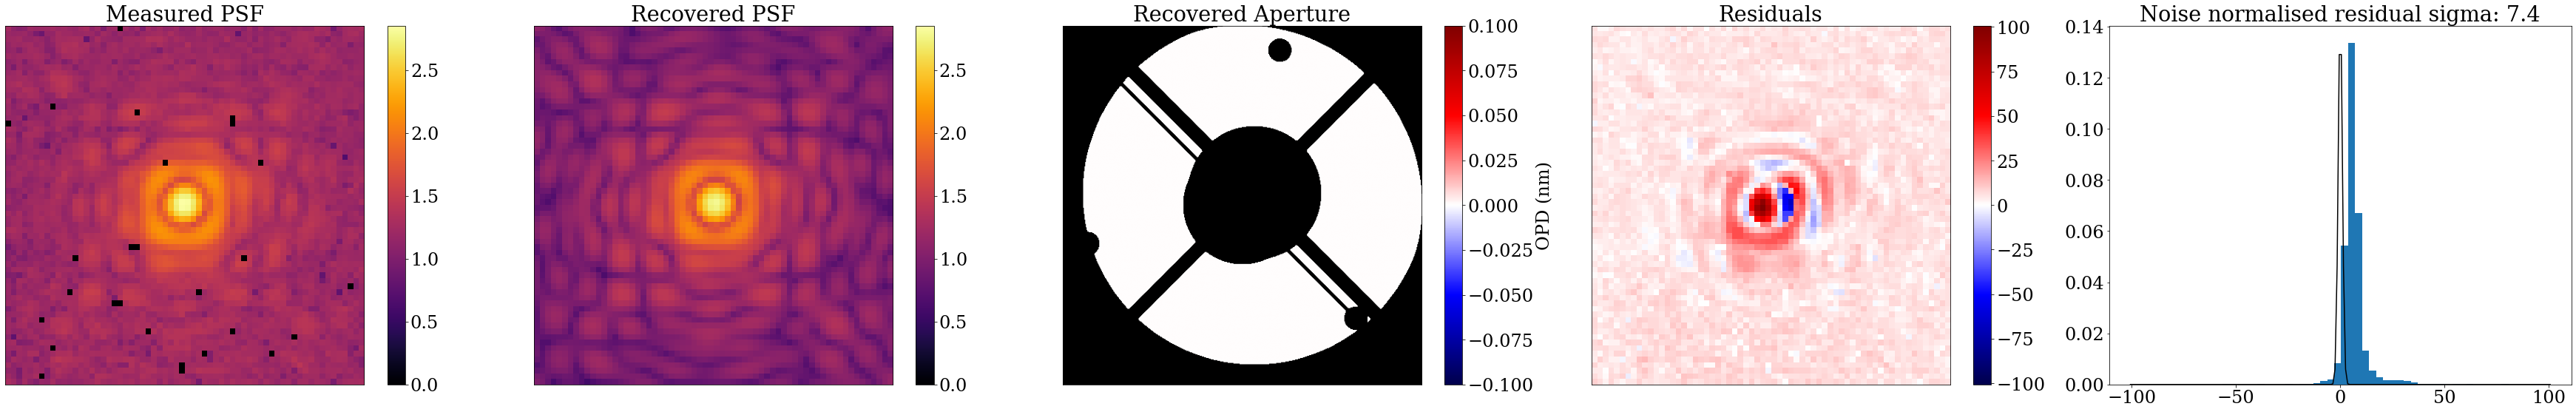

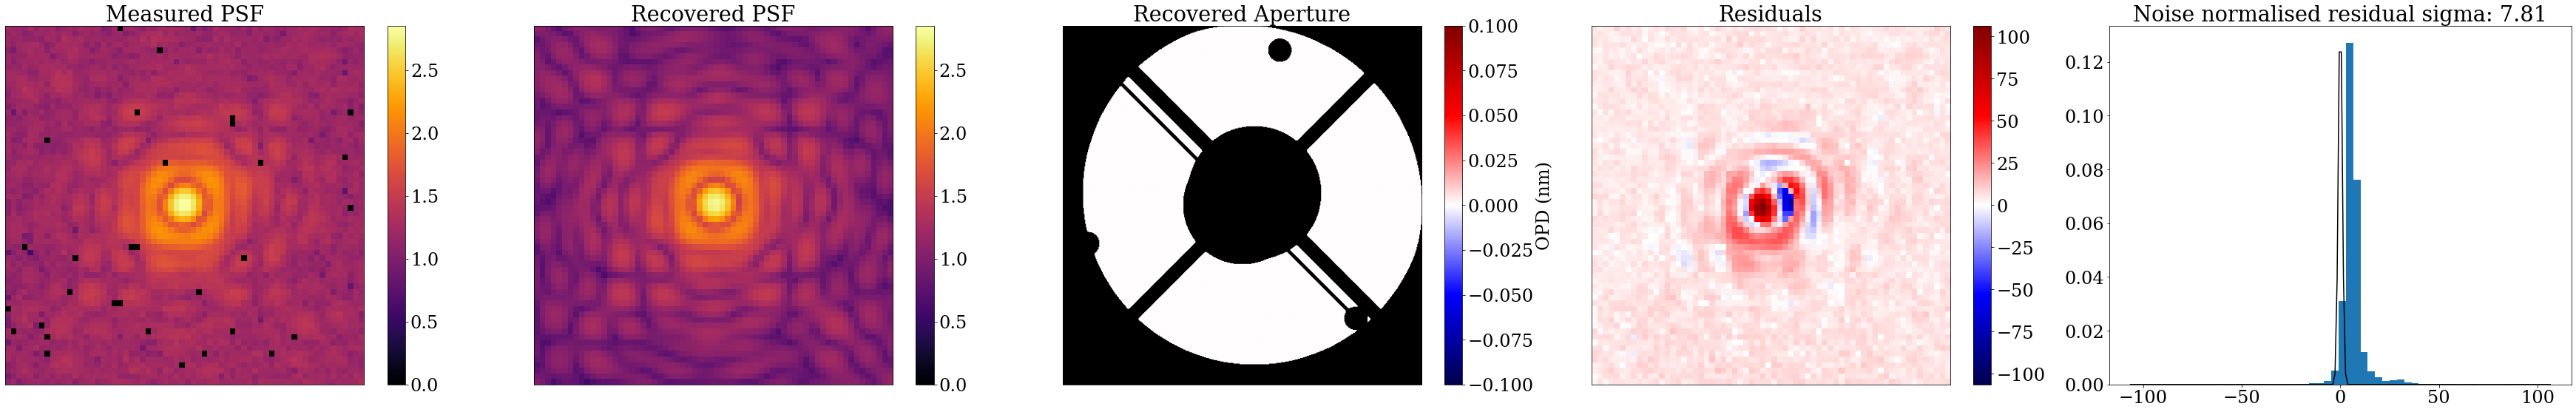

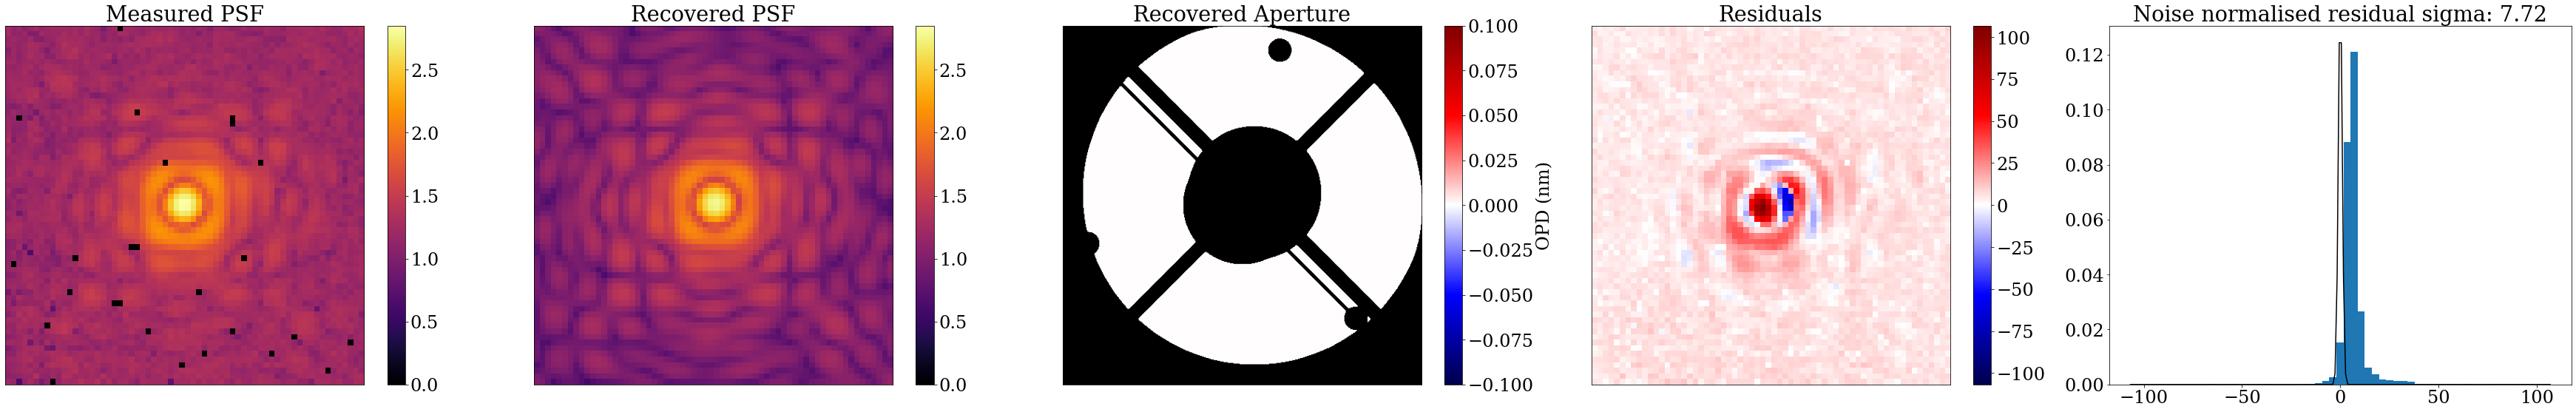

In [13]:
plot_comparison(model_single, params, exposures_single)

In [14]:
exposures_single[0].pam

-0.530879

In [15]:
exposures_single[0].bad[35,60]

Array(False, dtype=bool)

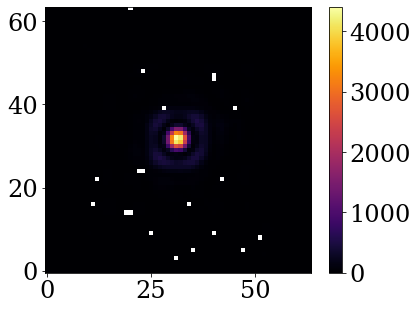

In [16]:
plt.imshow(exposures_single[0].data)
plt.colorbar()

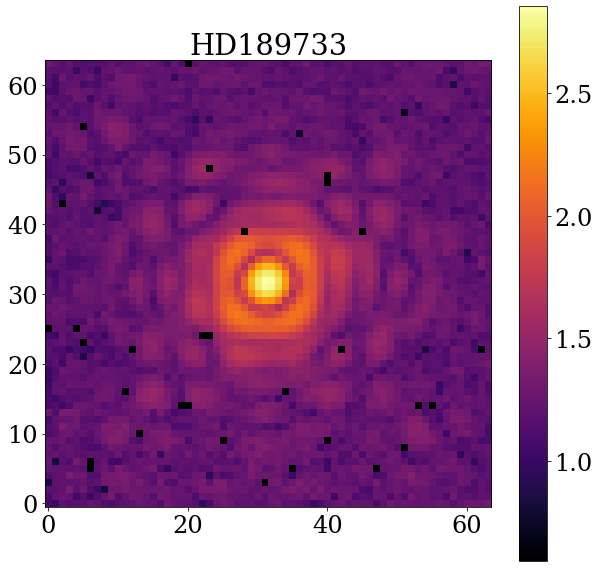

In [17]:
cmap = matplotlib.colormaps['inferno']
cmap.set_bad('k',1)
plt.figure(figsize=(10,10))
plt.imshow(exposures_single[0].data**0.125, cmap=cmap)
plt.title(exposures_single[0].target)
plt.colorbar()


In [18]:
def loss_fn(params, exposures, model):
    mdl = params.inject(model)
    return np.nansum(np.asarray([posterior(mdl,exposure) for exposure in exposures]))

In [19]:
def scheduler(lr, start, *args):
    shed_dict = {start: 1e10}
    for start, mul in args:
        shed_dict[start] = mul
    return optax.piecewise_constant_schedule(lr / 1e10, shed_dict)

base_sgd = lambda vals: optax.sgd(vals, nesterov=True, momentum=0.6)

opt = lambda lr, start, *schedule: base_sgd(scheduler(lr, start, *schedule))

base_adam = lambda vals: optax.adam(vals)
opta = lambda lr, start, *schedule: base_adam(scheduler(lr, start, *schedule))

base_lbfgs = lambda vals: optax.lbfgs(vals)

optl = lambda lr, start, *schedule: base_lbfgs(scheduler(lr, start, *schedule))




def flatten(l):
    if isinstance(l, (tuple, list)):
         return [a for i in l for a in flatten(i)]
    else:
        return [l]



g = 1e-2

things = {
    "positions": opt(g*15, 0),
    "spectrum": opt(g*20, 10),#, (20, 1.5)),
    "cold_mask_shift": opt(g*100, 40),
    #"cold_mask_shift": opt(g*80, 30),
    #"cold_mask_rot": opt(g*10, 100),
    "bias": opt(g*10, 20),
    "defocus": opt(g*8, 30),
    "fnumber": opt(g*10, 80),
    "aberrations": opt(g*15, 50),
}


groups = list(things.keys())
paths = flatten(groups)
optimisers = [things[i] for i in groups]
groups = [list(x) if isinstance(x, tuple) else x for x in groups]

In [20]:
losses, models = optimise(params, model_single, exposures_single, things, 100, recalculate=False)

Calculating Fishers


  0%|          | 0/9 [00:00<?, ?it/s]

{'na2m01k7q.positions': Array([[835911.7  , -56626.98 ],
       [-56627.027, 661585.2  ]], dtype=float32), 'na2m01k7q.spectrum': Array([[70964744.]], dtype=float32), 'na2m01k7q.cold_mask_shift': Array([[11484.098 ,  -950.0145],
       [ -950.0145, 11650.721 ]], dtype=float32), 'na2m01k7q.bias': Array([[8311.106]], dtype=float32), 'na2m01k7q.defocus': Array([[27899.986]], dtype=float32), 'na2m01k7q.fnumber': Array([[4263.6]], dtype=float32), 'na2m01k7q.aberrations': Array([[ 9.53689671e+00,  4.04836595e-01,  1.34556615e+00,
        -4.17151928e+00, -1.67023098e+00,  5.35217822e-01,
        -3.93448956e-02, -6.12871945e-01, -8.26499581e-01,
        -6.86668754e-01,  1.70755327e-01, -2.39204192e+00,
         2.25288057e+00, -1.15587711e+00, -1.62811792e+00,
         1.00833142e+00,  7.41710067e-02, -3.63671517e+00,
        -6.71674728e+00,  3.64343643e-01,  8.31231654e-01,
         1.88906312e+00,  3.76205683e+00, -5.46217740e-01,
        -5.70325442e-02,  2.50564432e+00],
       [ 4.0483

  0%|          | 0/100 [00:00<?, ?it/s]

In [21]:
losses[-1]

Array(158464.39, dtype=float32)

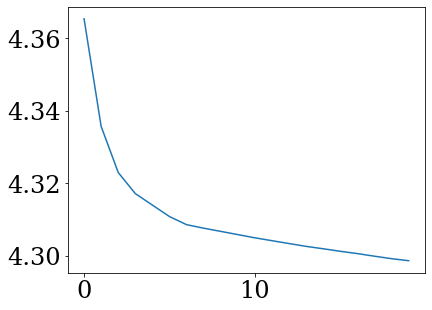

In [22]:
plt.plot(np.asarray(losses[-20:])/(len(exposures_single)*wid**2))

7
2.746141
2.751087
2.697194
2.579749
2.7449841
2.7244925
2.7264132
2.5870516
2.6161082


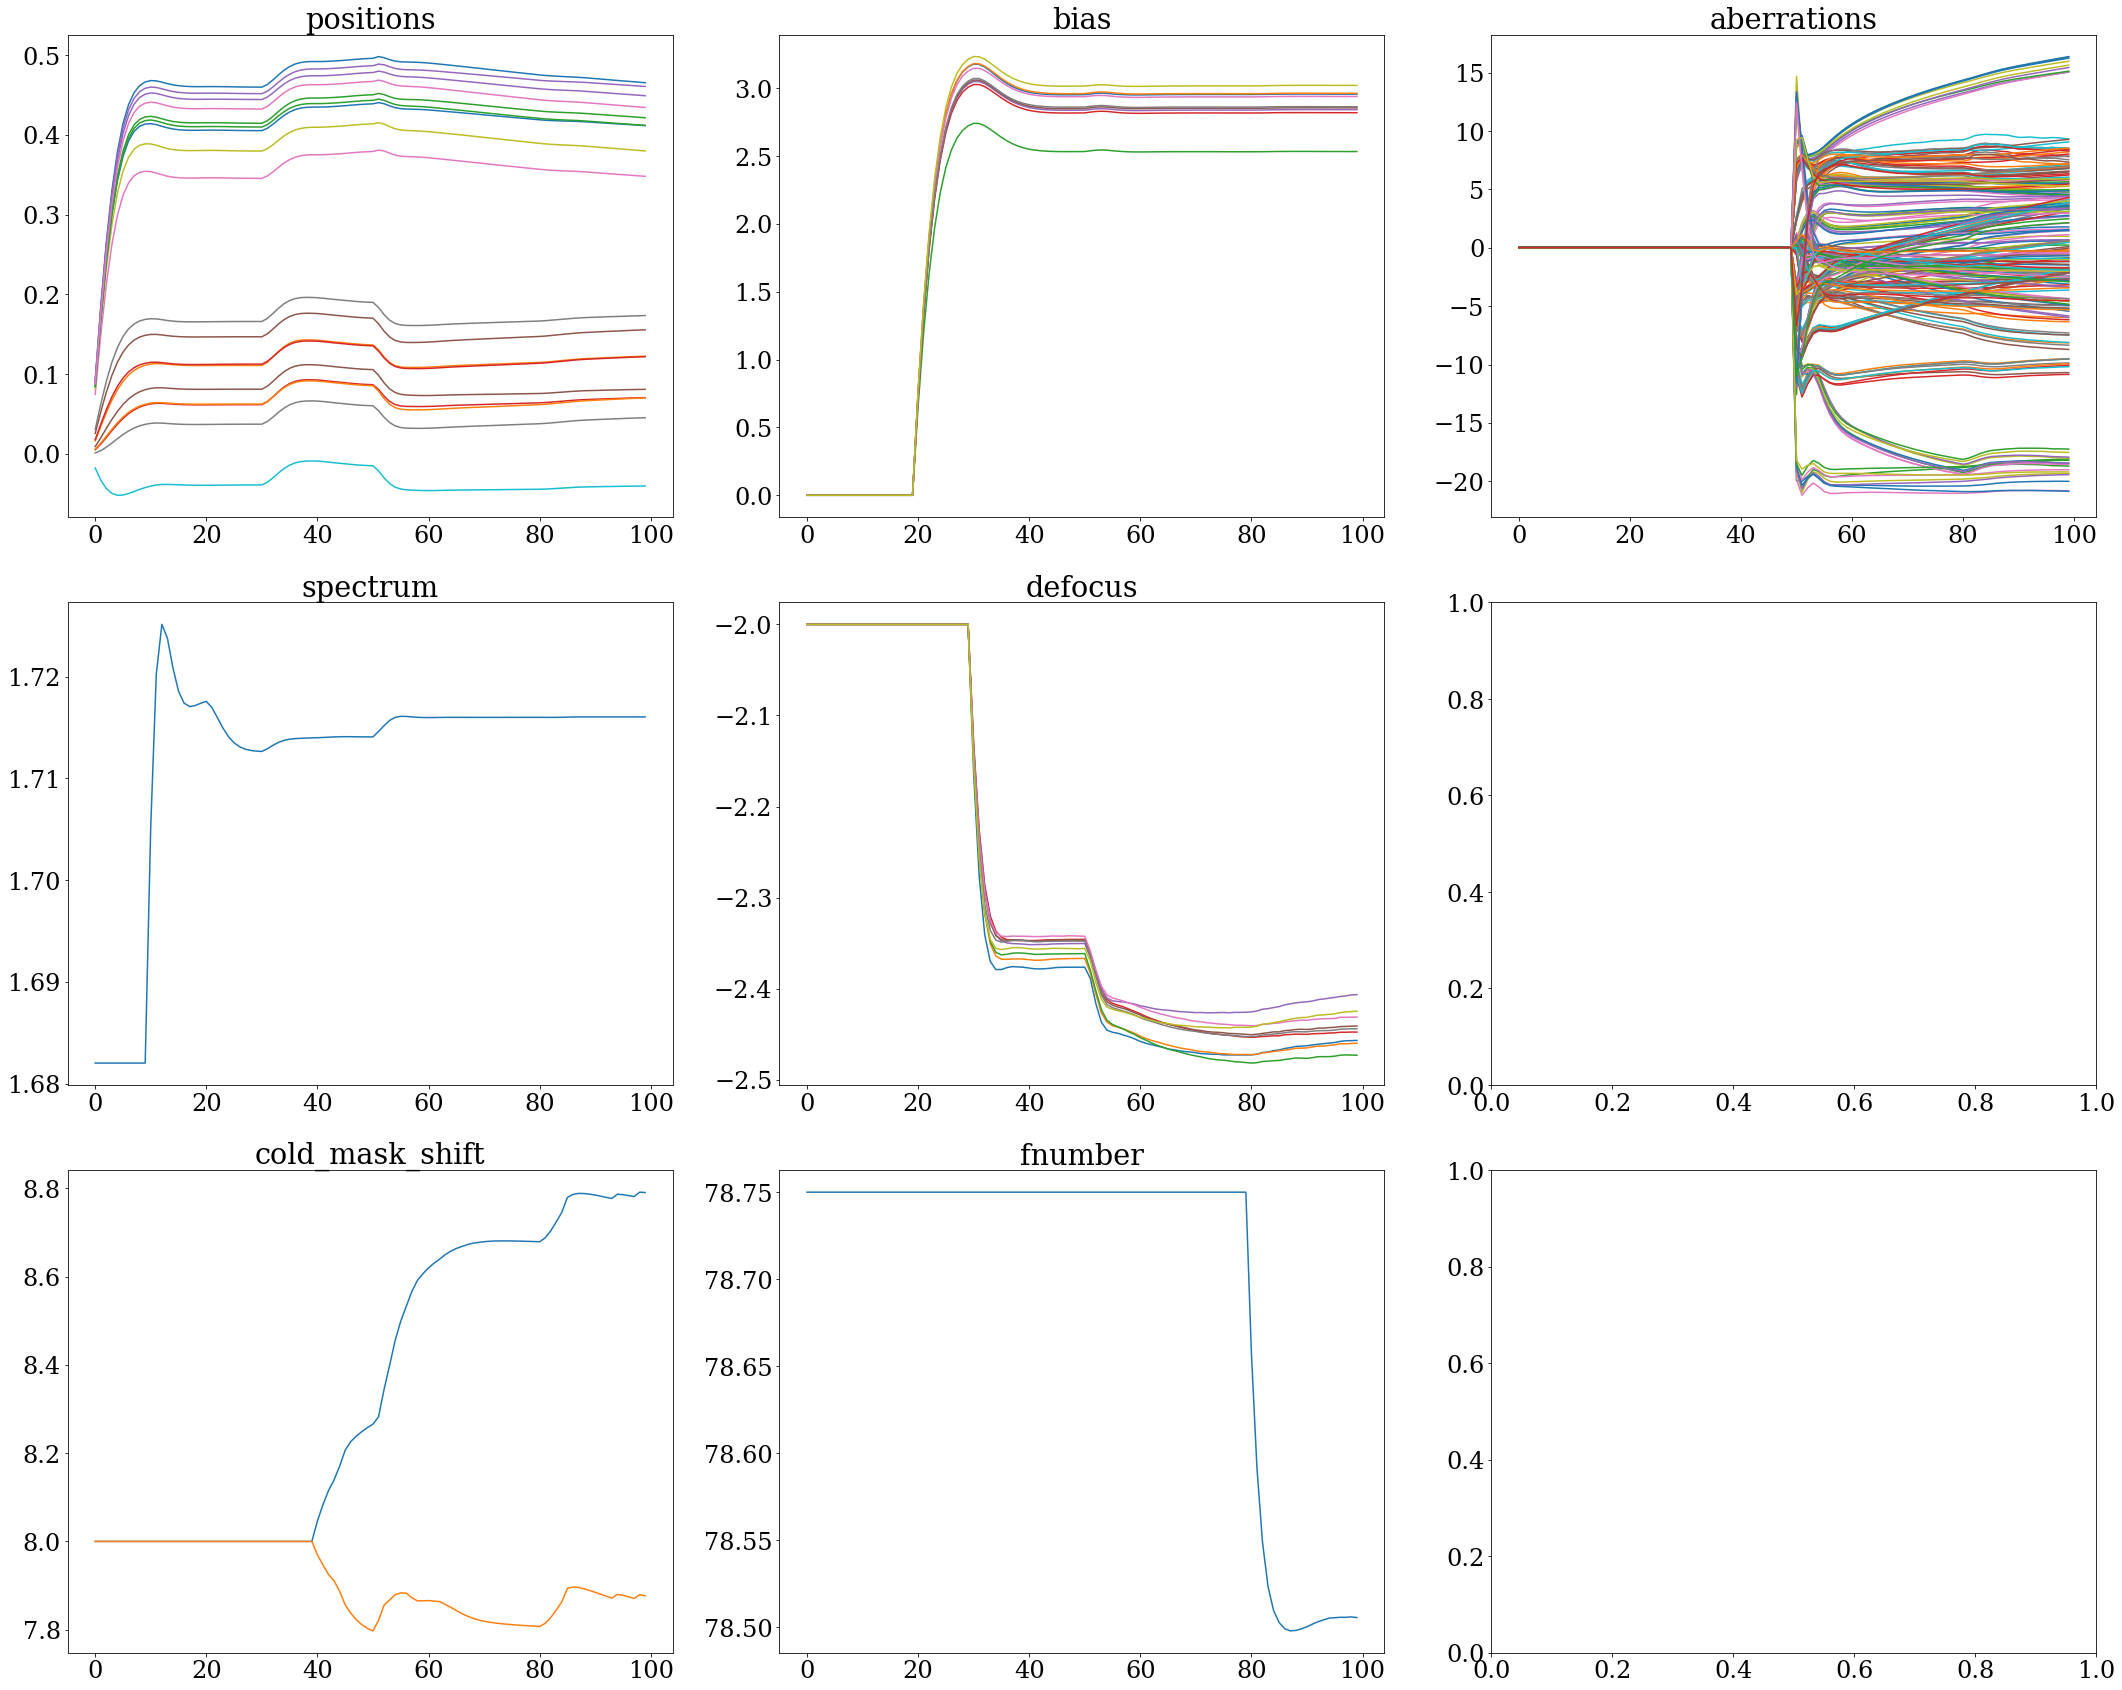

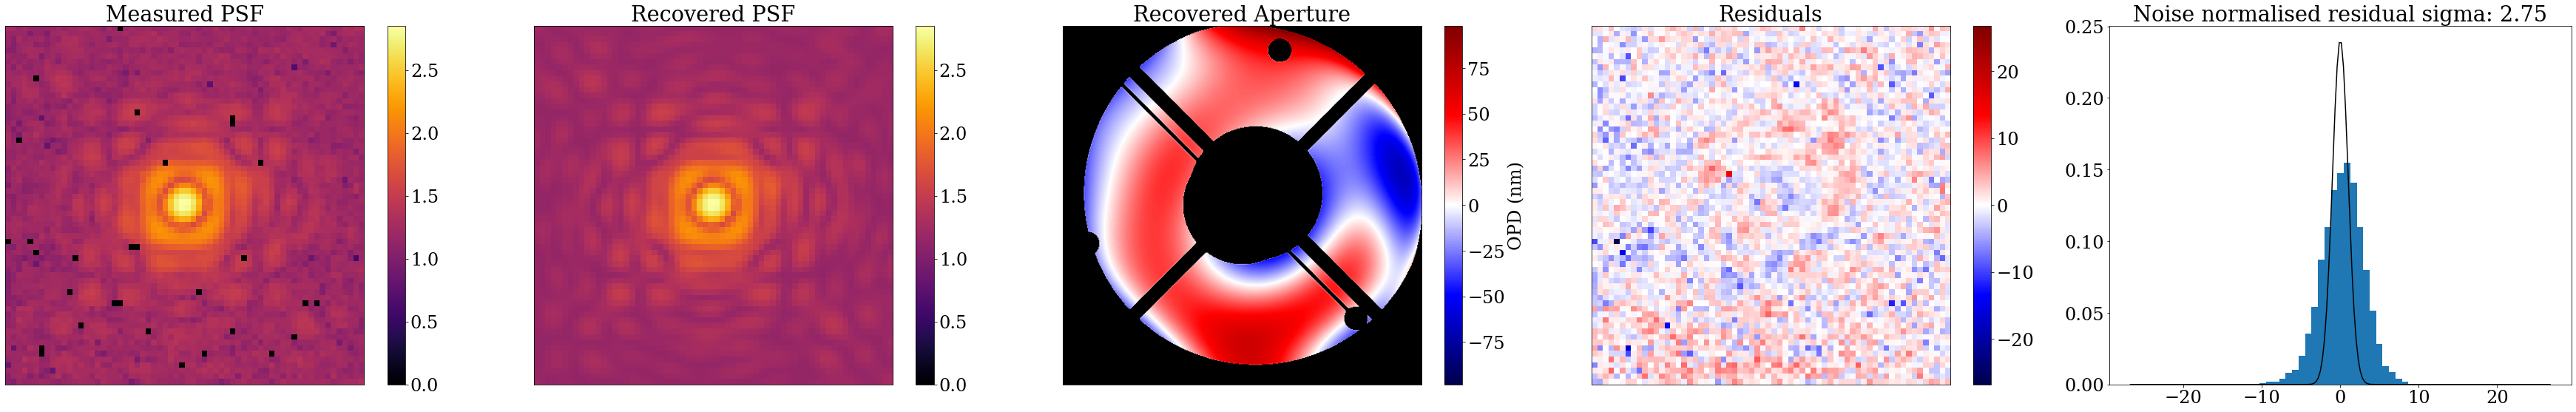

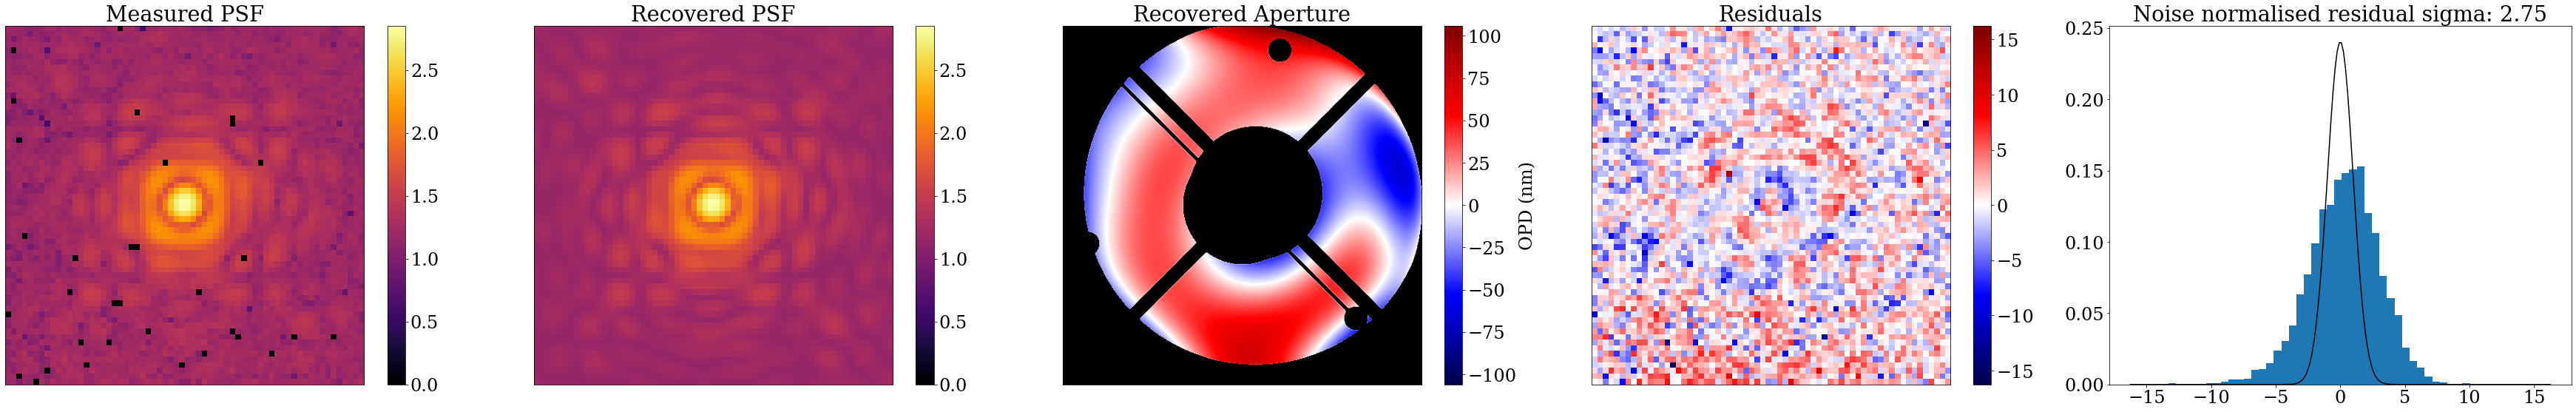

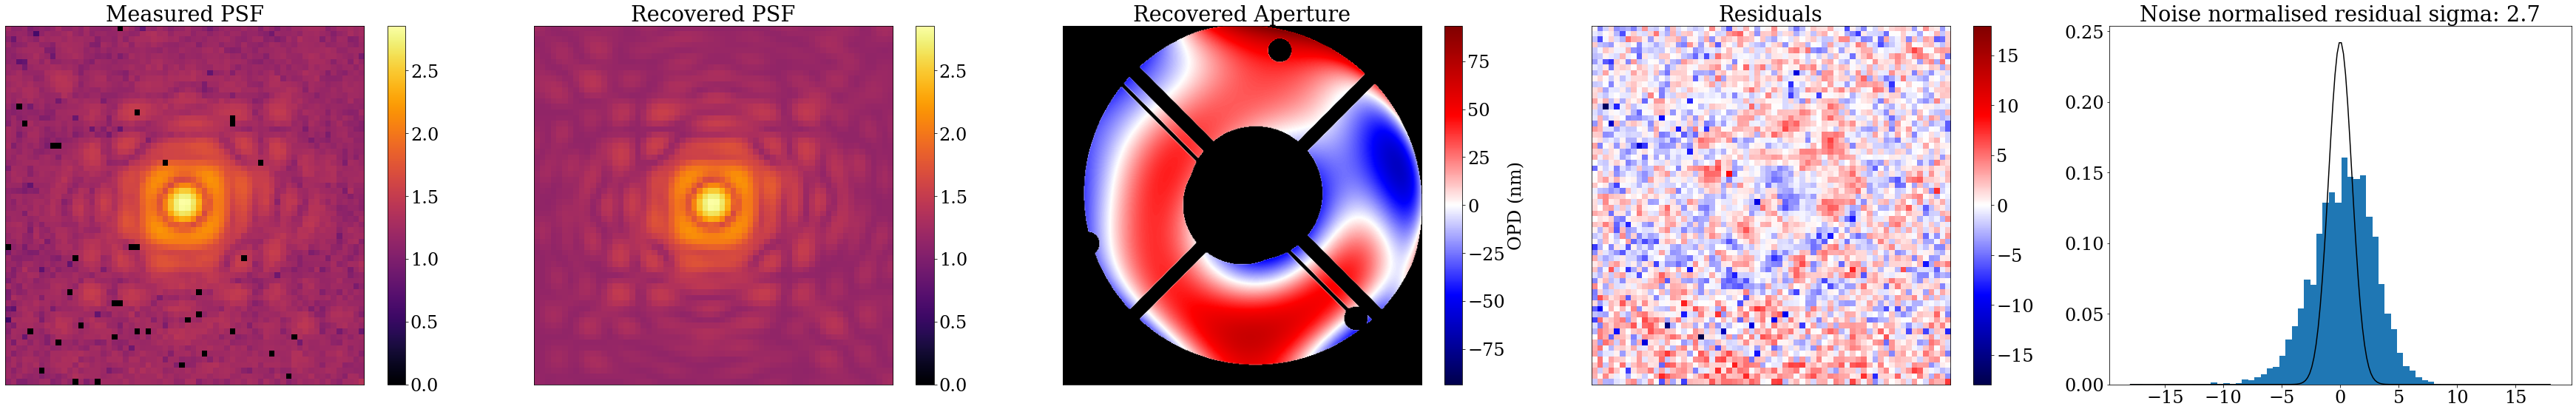

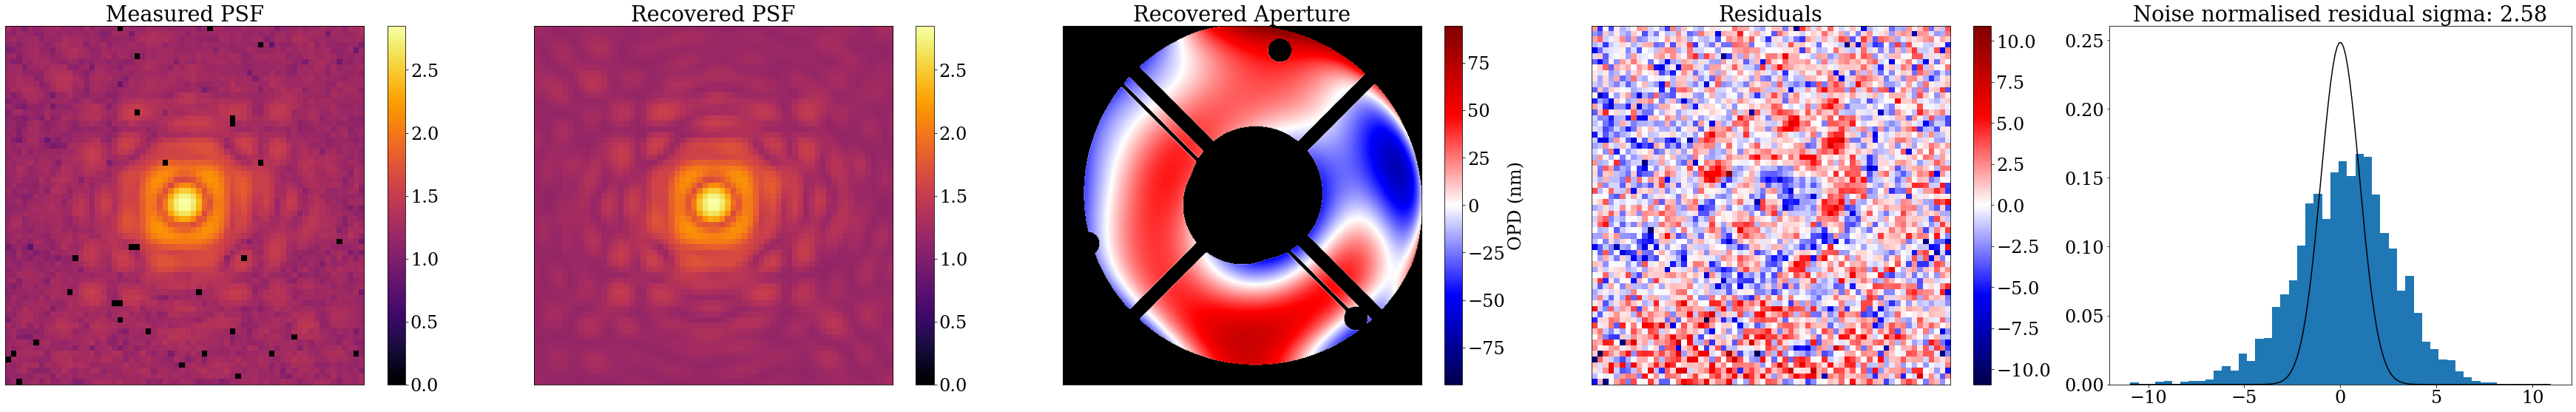

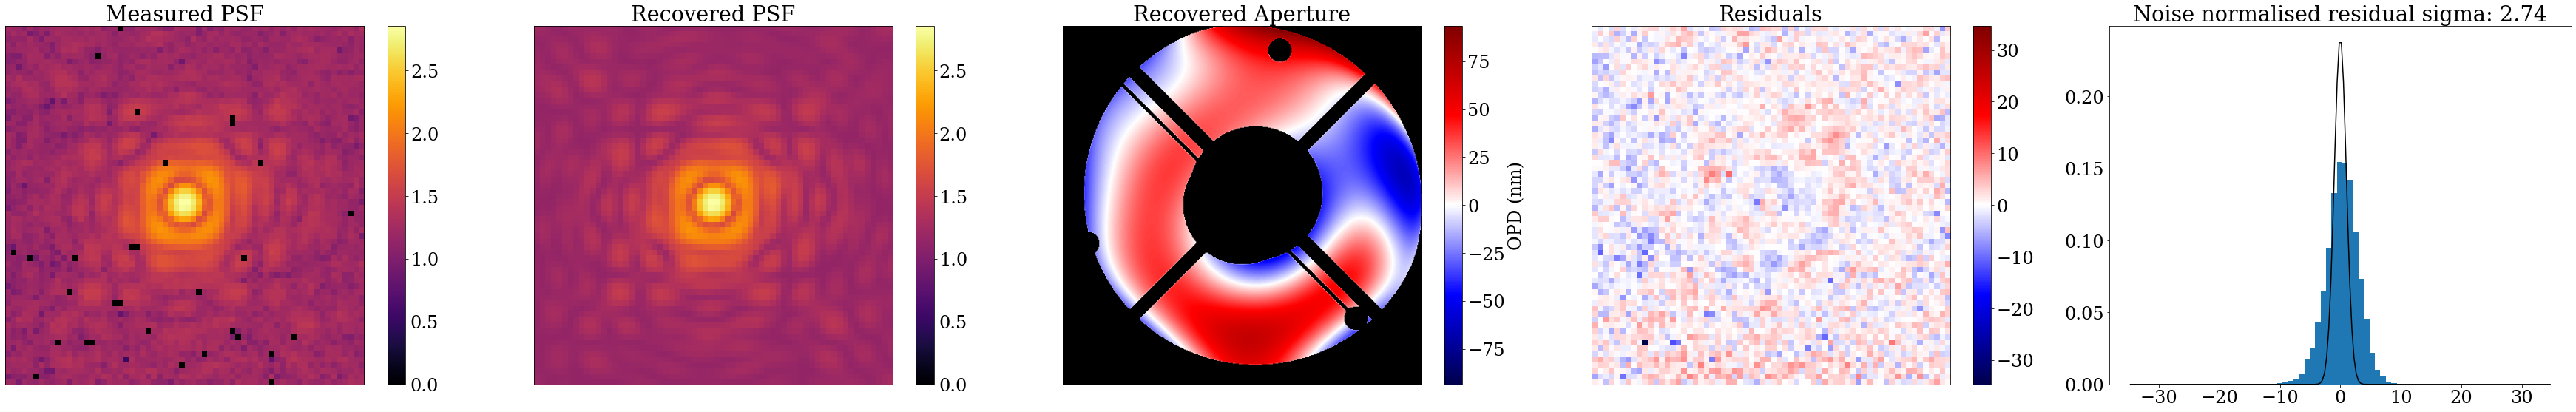

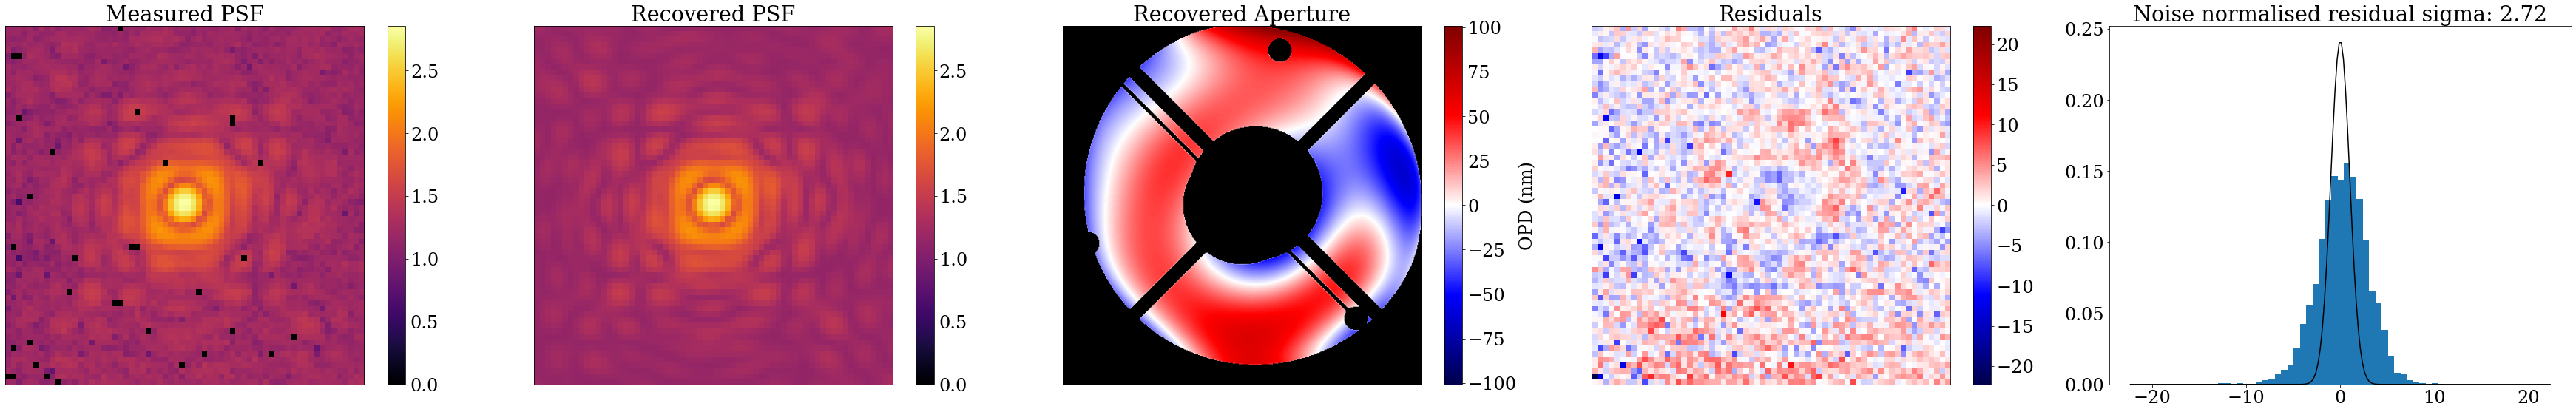

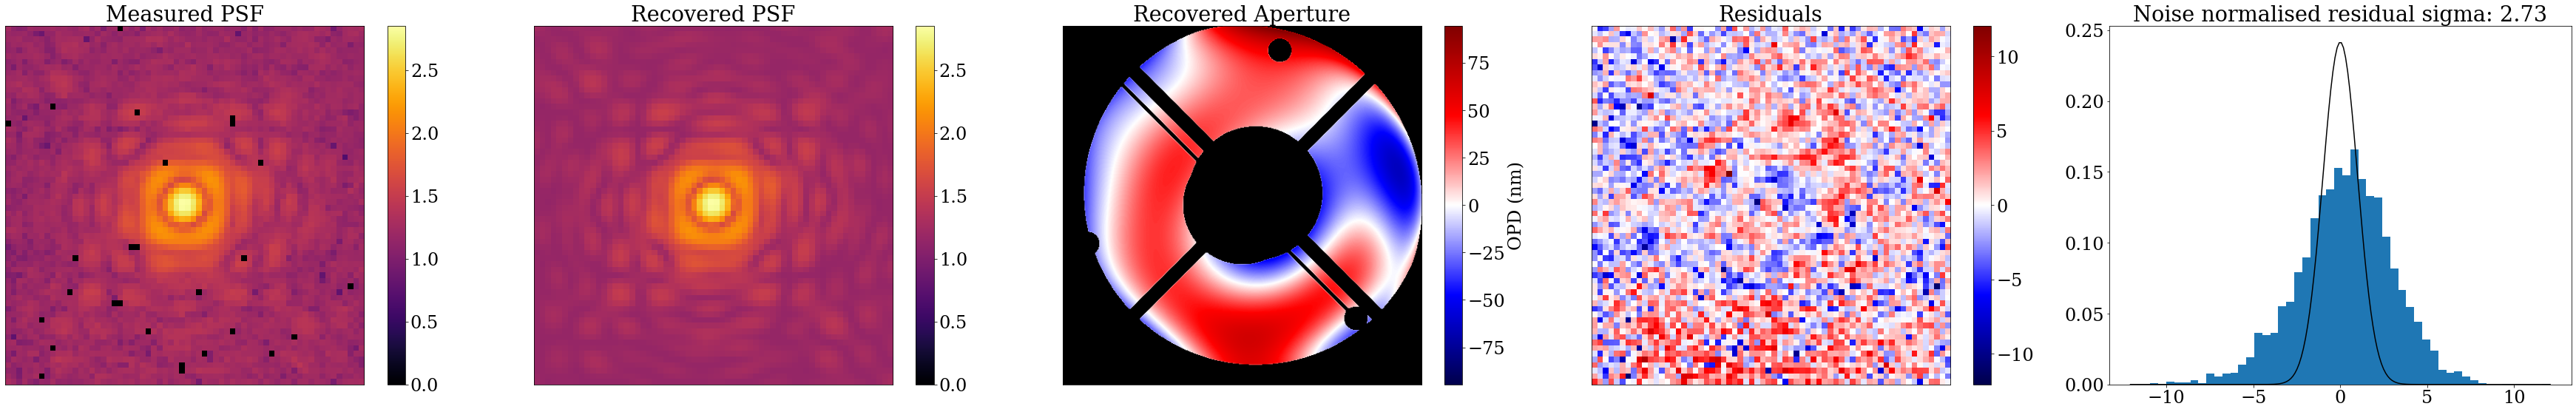

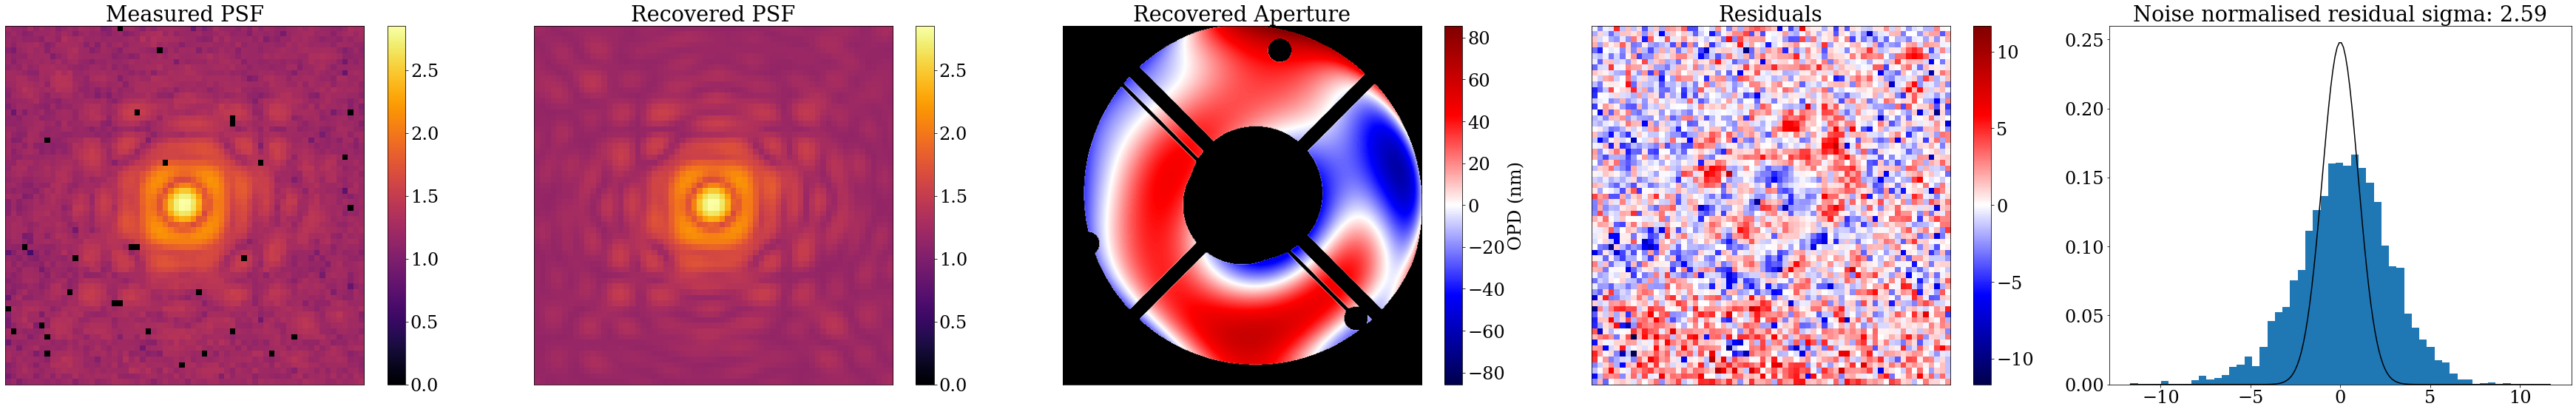

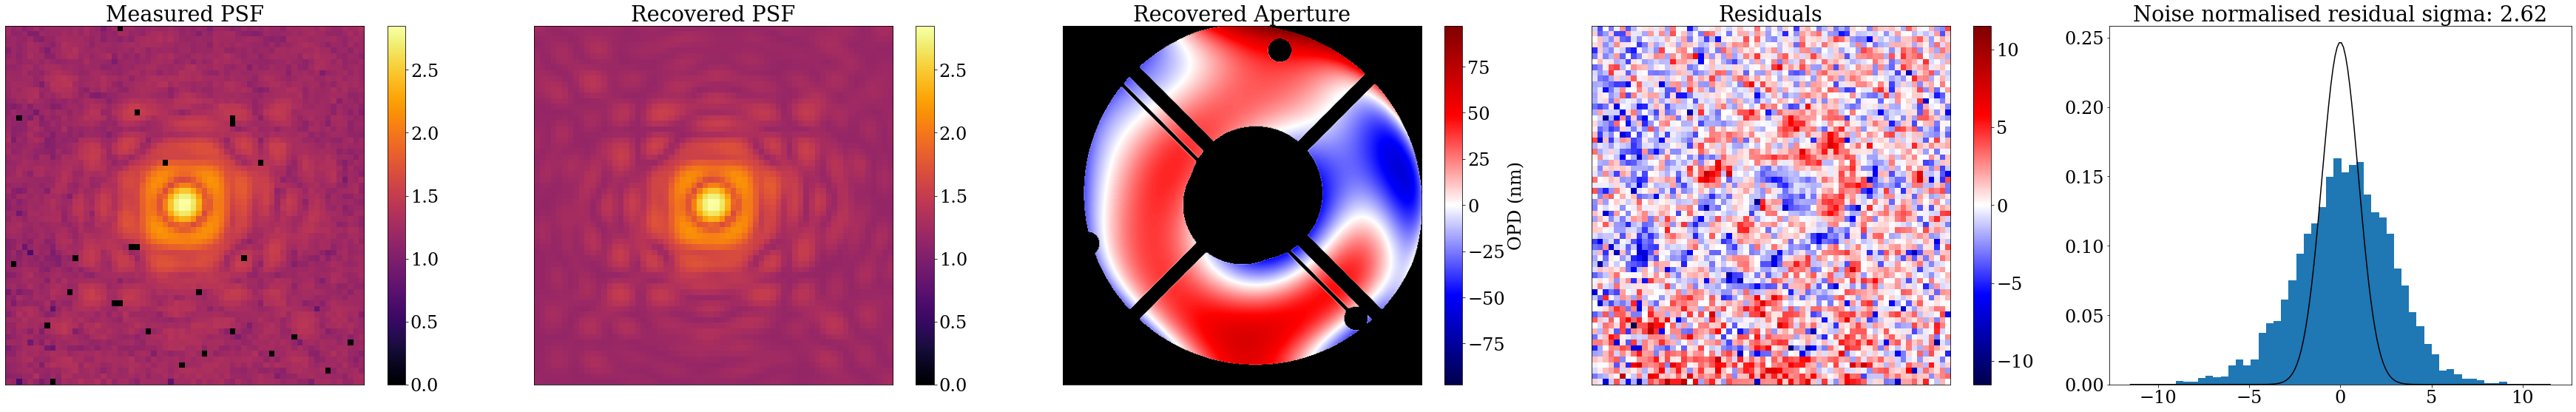

In [23]:
plot_params(models, groups, xw = 3)
plot_comparison(model_single, models[-1], exposures_single)

In [24]:
def loss_fn(params, exposures, model):
    mdl = params.inject(model)
    res = np.sum(np.asarray([posterior(mdl,exposure) for exposure in exposures]))
    return np.where(res==0.0, np.inf, res)

@eqx.filter_jit
def fun(params, args):
    exposures, model = args
    return loss_fn(params, exposures, model)

def optimise_optimistix(params, model, exposures, things, niter):
    paths = list(things.keys())
    optimisers = [things[i] for i in paths]

    model_params = ModelParams({p: params.get(p) for p in things.keys()})

    solver = optx.BFGS(rtol=1e-6, atol=1e-6,verbose=frozenset({"step_size", "loss"}))
    sol = optx.minimise(fun, solver, model_params, (exposures, model), throw=False, max_steps=niter)
    
    return sol



In [25]:
# sol = optimise_optimistix(models[-1], models[-1].inject(model_single), exposures_single, things, 5000)
# print(sol.value.params)
# print(fun(sol.value, (exposures_single, model_single)), (losses[-1]))

In [26]:
exposures_raw[0].filter

'F187N'

In [27]:
(2*1.22*1.87e-6/2.4)*57.6/40e-6

2.73768

In [28]:
def calc_nfringes(
    wavelength: float,
    npixels_in: int,
    pixel_scale_in: int,
    npixels_out: int,
    pixel_scale_out: float,
    focal_length: float = None,
    focal_shift: float = 0.0,
) -> Array:
    diameter = npixels_in * pixel_scale_in
    fringe_size = wavelength / diameter

    # Output array size
    output_size = npixels_out * pixel_scale_out
    if focal_length is not None:
        output_size /= focal_length + focal_shift

    # Fringe size and number of fringes
    return output_size / fringe_size

In [29]:
calc_nfringes(1.87e-6, 1024, 2.4/1024, 256, dlu.arcsec2rad(0.0432))

68.81263908611653

In [30]:
calc_nfringes(1.87e-6, 1024, 2.4/1024, 256, 40e-6, 57.6)

228.16399286987522

In [31]:
228.16399286987522/68.81263908611653

3.315727981081153

In [32]:
models[-1].params

{'aberrations': {'na2m01k7q': Array([-20.004007  ,   4.107213  ,  16.310883  ,   8.025795  ,
          -5.841161  ,   6.5371633 , -18.464687  ,  -1.6757174 ,
          -1.6875271 ,  -7.470705  ,   4.4306355 ,  -9.500596  ,
           4.0218244 ,  -2.4252245 ,  -3.4177227 ,  -4.9236426 ,
           4.1083703 ,   7.5309353 ,   0.97951376,   0.47486123,
          -1.4842734 ,  -1.9679334 ,   5.6487927 ,  -0.6341807 ,
           2.684442  ,   6.4930744 ], dtype=float32),
  'na2m01k8q': Array([-20.80909   ,   3.3744373 ,  15.976557  ,   7.1294074 ,
          -5.434546  ,   5.5319266 , -18.700113  ,  -2.1771305 ,
          -1.7012025 ,  -8.708973  ,   4.7083216 ,  -9.871119  ,
           3.7497683 ,  -3.6244206 ,  -3.1182168 ,  -5.972432  ,
           3.5574744 ,   7.8028135 ,   0.54270476,   0.09961237,
          -1.9061459 ,  -2.83289   ,   5.8195558 ,  -1.1687788 ,
           2.7707741 ,   5.281417  ], dtype=float32),
  'na2m01kaq': Array([-18.097801  ,   3.0925355 ,  15.039645  ,   6.557

In [33]:
calc_fishers(models[-1].inject(model_single), exposures_single, ["fnumber"], fisher_fn, recalculate=True, save=False)

  0%|          | 0/9 [00:00<?, ?it/s]

{'na2m01k7q.fnumber': Array([[7717.575]], dtype=float32),
 'na2m01k8q.fnumber': Array([[7759.8003]], dtype=float32),
 'na2m01kaq.fnumber': Array([[8021.1753]], dtype=float32),
 'na2m01kbq.fnumber': Array([[7911.225]], dtype=float32),
 'na2m01kcq.fnumber': Array([[7995.45]], dtype=float32),
 'na2m01kdq.fnumber': Array([[7944.6377]], dtype=float32),
 'na2m01keq.fnumber': Array([[7964.1]], dtype=float32),
 'na2m01kfq.fnumber': Array([[7903.5376]], dtype=float32),
 'na2m01kgq.fnumber': Array([[7905.3003]], dtype=float32)}

In [34]:
np.sqrt(1/7395.6)

Array(0.01162822, dtype=float32, weak_type=True)

In [35]:
fsh = calc_fishers(models[-1].inject(model_single), exposures_single, ["defocus"], fisher_fn, recalculate=True, save=False)

  0%|          | 0/9 [00:00<?, ?it/s]

In [36]:
list(fsh.values())[0].flatten()[0]

Array(89381.945, dtype=float32)

In [37]:
defocuses = [x/3.31 for x in models[-1].params["defocus"].values()]
errs = [1/3.31/float(x.flatten()[0]) for x in fsh.values()]
mjds = [exp.mjd for exp in exposures_single]
mjds= [(x - mjds[0])*24*60 for x in mjds]


In [38]:
np.asarray([x for x in models[-1].params["cold_mask_shift"].values()])

Array([[8.790379, 7.877084]], dtype=float32)

In [39]:
np.asarray([x for x in models[-1].params["spectrum"].values()])

Array([1.7160298], dtype=float32)

Text(0, 0.5, 'Defocus (nm)')

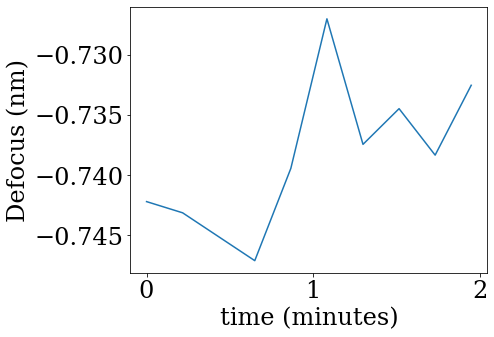

In [40]:
plt.errorbar(mjds, defocuses, np.squeeze(np.asarray(errs)))
plt.xlabel("time (minutes)")
plt.ylabel("Defocus (nm)")

In [41]:
abb = np.zeros((len(exposures_single), n_zernikes+1))
abb = abb.at[:,1:].set(np.asarray([x for x in models[-1].params["aberrations"].values()]))#.transpose()
abb = abb.at[:,0].set(np.asarray([float(x)/20 for x in models[-1].params["defocus"].values()]))
print(abb.shape)

pca = PCA(n_components=5)
pca.fit(abb)
print(pca.singular_values_)
print(pca.components_)
print(pca.explained_variance_)
components = pca.components_

(9, 27)
[5.394334  4.252495  3.6485465 2.7894616 2.3652546]
[[-4.93984589e-05  4.88726139e-01  7.01795507e-04 -1.09486289e-01
   9.31814685e-03  2.62154371e-01  2.73584723e-01  1.99265257e-01
  -2.99675241e-02  4.65446442e-01  1.81962505e-01 -2.74390224e-02
  -9.70651954e-02 -4.87089679e-02  1.66558787e-01  1.65028229e-01
   1.09803818e-01 -1.49682509e-02  1.87958524e-01  3.65604639e-01
  -5.36262766e-02  1.03887543e-02  3.18555981e-02 -8.95027742e-02
   4.18311842e-02 -1.54628143e-01  1.69337273e-01]
 [ 2.17826993e-04  7.55228922e-02  2.28145629e-01  1.12460785e-01
   6.04833782e-01 -3.14885117e-02  2.11721584e-02  1.32946044e-01
   1.59498781e-01 -2.29076162e-01  2.55201757e-01 -1.92997418e-02
   1.71054646e-01 -3.54215765e-04  1.45500572e-02 -3.16799283e-02
   1.96347222e-01 -4.69252653e-02 -5.96517436e-02 -1.15436628e-01
   2.06258938e-01  5.95062925e-03  1.40984789e-01 -1.33164153e-01
   1.67321503e-01  1.54590532e-01  4.25498366e-01]
 [ 5.92383090e-04  1.95576195e-02 -3.98243852e

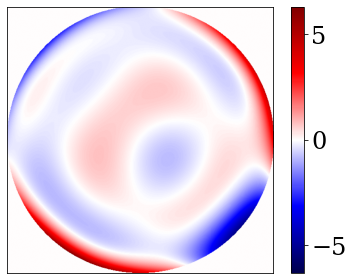

In [42]:
ap = dl.AberratedAperture(dl.CircularAperture(radius=1.2), noll_inds=np.arange(4,4+n_zernikes+1), coefficients=components[0])
coords = dlu.pixel_coords(512, 2.4)

opd = ap.eval_basis(coords)#*1e9
m = np.max(np.abs(opd))
plt.imshow(opd, cmap='seismic', vmin=-m, vmax=m)
plt.xticks([])
plt.yticks([])
plt.colorbar()
